# YOLOv11 ile Metal Yüzeylerde Hasar Tespiti Projesi
Bu proje kapsamında, YOLOv11 ile metal yüzeylerdeki hasarların tespit edilmesi amaçlanmıştır.

## Başlarken
Bu bölümde, bazı önemli kavramlar üzerinde durulacaktır.
### YOLO nedir?
**"You Only Look Once" (YOLO)**, Joseph Redmon, Santosh Divvala, Ross Girshick ve Ali Farhadi tarafından 2015 yılında yayımlanan ünlü araştırma makaleleri [*You Only Look Once: Unified, Real-Time Object Detection*](https://arxiv.org/abs/1506.02640)'da tanıtılan, son teknoloji bir gerçek zamanlı nesne tespit algoritmasıdır.Yazarlar, nesne tespit problemini sınıflandırma yerine bir regresyon problemi olarak ele alarak, bir tek evrişimli sinir ağı (CNN) kullanarak sınır kutularını mekânsal olarak ayırmış ve her tespit edilen görüntüye olasılıklar atamışlardır.

![Faster R-CNN, R-FCN, SSD ve YOLO modellerini kullanarak farklı çözünürlüklere sahip giriş görüntüleriyle saniyede işlenen karelerin (FPS) karşılaştırılması.](https://www.researchgate.net/publication/342570032/figure/fig6/AS:908180288708621@1593538462894/Comparison-of-frames-processed-per-second-FPS-implementing-the-Faster-R-CNN-R-FCN-SSD.png)

### Neden YOLO Tercih Edilmiştir?
YOLO modelleri çeşitli nedenlerle oldukça popülerdir.  

* **Birincisi, YOLO modelleri hızlıdır.** Bu, YOLO modellerini yüksek kare-saniye (FPS) oranında video akışlarını işlemek için kullanmanıza olanak tanır. Bu hız, bir video kamerasında canlı tahminler çalıştırmayı ve hızlı bir şekilde değişen bir şeyi (örneğin, bir futbol sahasında topun pozisyonunu ya da bir taşıma bandındaki paketin konumunu) takip etmeyi planlıyorsanız oldukça faydalıdır.
* **İkincisi, YOLO modelleri doğruluk açısından liderliğini sürdürmektedir.** Kasım 2022'de model ailesinin en yenisi olan YOLOv7, MS COCO nesne algılama veri kümesine göre ölçüldüğünde son teknoloji performansa sahiptir. Başka harika modeller de olsa, YOLO tespit doğruluğu ile güçlü bir üne sahiptir.
* **Üçüncüsü, YOLO model ailesi açık kaynaklıdır.** Bu durum, YOLO modelleriyle aktif olarak çalışan ve tartışan büyük bir YOLO topluluğunun oluşmasını sağlamıştır. Bu sayede, bu modellerin arkasındaki mantık ve kullanım hakkında internette bolca bilgi bulunabilir ve bilgisayarla görü topluluğuna ulaşarak yardım almak oldukça kolaydır.  

Bu üç faktör bir araya geldiğinde, neden bu kadar çok mühendisin bilgisayarla görü modellerini çalıştırmak için YOLO'yu tercih ettiği açıkça görülmektedir.
### Evrişimli Sinir Ağı Nedir?
**[Evrişimli Sinir Ağı](https://www.geeksforgeeks.org/neural-networks-a-beginners-guide/) (Convolutional Neural Network - CNN)**, özellikle görüntü tanıma ve işleme görevleri için oldukça uygun bir derin öğrenme algoritması türüdür. CNN, evrişim katmanları, [havuzlama (pooling) katmanları](https://www.geeksforgeeks.org/cnn-introduction-to-pooling-layer/) ve tam bağlı (fully connected) katmanlar gibi birden fazla katmandan oluşur. CNN'lerin mimarisi, insan beynindeki görsel işlemeye ilham alarak tasarlanmıştır ve görüntülerdeki hiyerarşik desenleri ve mekânsal bağımlılıkları yakalamakta oldukça başarılıdır.

![Örnek bir CNN yapısı.](https://miro.medium.com/v2/resize:fit:850/1*zluue9PRiqLxhG6h7Qprlg.png)

## Neden Metal Yüzeyler Üzerindeki Hataların Tespiti Önemlidir?
> Son yıllarda üretim aşamasında otomatik hata tespit sistemlerine olan ihtiyaç artmaktadır. Ürünlerin kusurlarını tespit etmek ve yerlerini belirlemek, önemli ve gerekli bir kalite kontrol sürecidir. Kusur tipinin ve kusurlu alanın kısa sürede tespit edilmesi de kalite kontrol performansı açısından oldukça önemlidir. Günümüzde, insan iş gücüne dayalı kusurların kontrol edilmesi, üretim sürecinde geleneksel bir yöntem olarak kusurları tespit etmek için hala kullanılmaktadır. İnsana bağlı olan bu yöntemde hız oranı düşük ve hata oranı yüksektir. Üretim aşamasındaki yüzeylerin kalite kontrol çalışmalarında bilgisayarla görme teknikleri sıklıkla kullanılmaktadır. Birçok endüstriyel uygulamada, tekstil, metal ve cam kusur tespiti gibi yüzey kusur tespiti yaygın olarak gerçekleşir. Metal yüzeylerde çeşitli ve karmaşık tipte kusurlar (yamalar, noktalı yüzeyler, çatlak ve çizik, girintili tufal, madde karışımı vb.) vardır. Gerçek zamanlı metalik hata tespit sistemlerinde hız ve yüksek doğruluk üretim aşamasına olumlu etki yapmaktadır. Yüzeylerde kusur tespiti için geleneksel yöntemler, görüntü işleme veya makine öğrenmesi tekniklerine dayanır, ancak belirli ölçeklerde veya belirli aydınlatma koşullarında düşük gürültü ve güçlü kontrast ile farklı kusurları tespit edebilirler. Günümüzde endüstriyel denetim sistemlerinde bilgisayarlı görme ve derin öğrenme yaklaşımları önemli bir yere sahiptir. Bilgisayarla görme teknolojisi, üretim hattındaki ürünlerin hızlı ve hatasız kontrolü için gereklidir. Bilgisayarla görü kavramının önemi, klasik yöntemlerin sorunları göz önüne alındığında anlaşılır. Metal yüzeyler aydınlatma ve ışık yansıması gibi çevresel faktörlerden kolayca etkilendiğinden, metalik yüzeylerde kusur tespiti zorlu bir problemdir. Karmaşık gerçek dünya problemlerinde geleneksel kusur tespiti algoritmaları verimsiz ve hatalıdır.

> *Çakar, D. Ö. Ü. S., & Dalı, S. Ü. F. B. E. B. M. a. B. (2023). Derin öğrenme yöntemleri ile metalik yüzeylerde kusur tespiti ve sınıflandırılması = Defect detection and classification on metallic surfaces using deep learning methods. https://acikerisim.sakarya.edu.tr/xmlui/handle/20.500.12619/101474*


## Projenin Kodları
Bu kodlardaki amaç, modelin eğitimini göstermek ve eğitim çıktılarını göstermektir. Gelişmiş uygulamalarda kullanmak için daha detaylı düzenlemelere ihtiyaç duyulmaktadır.

### Geliştirme Ortamının Ayarlanması
Bu notebook, Kaggle üzerinden eğitilmiştir. Bu nedenle Kaggle için varsayılan ayarlar kullanılmıştır.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Hızlandırıcı Kullanımı
Modelin daha hızlı ve daha verimli bir şekilde eğitilmesi için, Kaggle bünyesindeki hızlandırıcılardan faydalanılmıştır. Bu proje kapsamında [P100](https://www.nvidia.com/en-in/data-center/tesla-p100/) hızlandırıcısı kullanılmıştır.

![](https://www.nvidia.com/content/dam/en-zz/Solutions/Data-Center/tesla-p100/tesla-p100-performance-chart-r2-843-udt@2x.png)

In [2]:
!nvidia-smi

Sat Dec 21 21:16:54 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P0             27W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
HOME = os.getcwd()
print(HOME)

/kaggle/working


### Ultralytics Kullanımı
Bu proje kapsamında kullanılan [YOLOv11](https://docs.ultralytics.com/models/yolo11/), [Ultralytics](https://www.ultralytics.com/) tarafından geliştirilmiştir. `ultralytics` uygulaması üzerinden modele erişim sağlanmıştır.

![YOLO ailesi modellerin performans bakımından karşılaştırılması.](https://raw.githubusercontent.com/ultralytics/assets/refs/heads/main/yolo/performance-comparison.png)

In [4]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.52 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6037.6/8062.4 GB disk)


### Veri Setinin Projeye Eklenmesi
Roboflow üzerinden oluşturulan veri seti, `roboflow` kütüphanesi kullanılarak notebook'a entegre edilmiştir. Bu sayede harici bir depolama alanı kullanılmadan, internet üzerinden veri setinin projeye aktarımı sağlanmıştır.

***Kullanılan [veri seti](https://universe.roboflow.com/engdes2/metal-surface-defects-rmbhy/dataset/2), geçtiğimiz seneki Mühendislik Tasarımı-2 projesi için hazırlanmıştır.***

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="KENDI_API_KEYINIZ")
project = rf.workspace("engdes2").project("metal-surface-defects-rmbhy")
version = project.version(2)
dataset = version.download("yolov11")             

/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Metal-Surface-Defects-2 in yolov11:: 100%|██████████| 7956/7956 [00:00<00:00, 8121.45it/s]


In [6]:
!sed -i '$d' {dataset.location}/data.yaml   # Delete the last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the second-to-last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the third-to-last line

!echo 'test: ../test/images' >> {dataset.location}/data.yaml
!echo 'train: ../train/images' >> {dataset.location}/data.yaml
!echo 'val: ../valid/images' >> {dataset.location}/data.yaml

### Modelin Eğitilmesi
`!yolo` komutu üzerinden model eğitimi gerçekleştirilmiştir. Bu komutun gerekli tanımlamaları da yapılıştır.
* `task=` tanımı ile modelin hangi özellik üzerinden çalışacağı belirlenmiştir.
* `mode=` tanımı ile modelin hangi işlevi gerçekleştireceği belirlenmiştir.
* `model=` tanımı ile hangi model ağırlığının çalışacağı belirlenmiştir. Model ağırlığı, parametre sayısı üzerinden belirlenir.

| Model   | Size (pixels) | mAPval 50-95 | Speed (CPU ONNX ms) | Speed (T4 TensorRT10 ms) | Params (M) | FLOPs (B) |
|---------|---------------|--------------|---------------------|--------------------------|------------|-----------|
| **YOLO11n** | 640           | 39.5         | 56.1 ± 0.8          | 1.5 ± 0.0               | 2.6        | 6.5       |
| **YOLO11s** | 640           | 47.0         | 90.0 ± 1.2          | 2.5 ± 0.0               | 9.4        | 21.5      |
| **YOLO11m** | 640           | 51.5         | 183.2 ± 2.0         | 4.7 ± 0.1               | 20.1       | 68.0      |
| **YOLO11l** | 640           | 53.4         | 238.6 ± 1.4         | 6.2 ± 0.1               | 25.3       | 86.9      |
| **YOLO11x** | 640           | 54.7         | 462.8 ± 6.7         | 11.3 ± 0.2              | 56.9       | 194.9     |

* `data=` tanımı ile verisetinin konumu belirlenmektedir.
* `epoch=` tanımı ile modelin kaç tur boyunca eğitileceği belirlenir.

**Epoch:** Bir epoch, eğitim veri setindeki tüm verilerin modele bir kez iletilmesi ve modelin bu veriler üzerinde öğrenme yapması anlamına gelir. Ancak genellikle veri seti bir kerede tümüyle modele verilmez; bu nedenle epoch'lar sırasında veri, mini-batch adı verilen küçük parçalara bölünerek işlenir.

* `imgsz=` tanımı ile modelin eğitiminde kullanılacak resimlerin piksel cinsinden boyutları tanımlanır. Bu tanımlama sayesinde, başka bir ayarlama yapılmadan modelin daha hızlı çalışması amaçlanmaktadır. 

In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/kaggle/working
100%|███████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 114MB/s]
Ultralytics 8.3.52 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/datasets/Metal-Surface-Defects-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, em

### Eğitim Sonuçlarının Değerlendirilmesi
Modelin eğitimi tamamlandıktan sonra, model tarafından çeşitli çıktılar elde edilmektedir. Bu çıktıların görselleştirmeleri aşağıda gösterilmiştir.

---
*ChatGPT tarafından yorumlandı.*  
<img src="https://upload.wikimedia.org/wikipedia/commons/0/04/ChatGPT_logo.svg" alt="ChatGPT Logo" style="width: 50px; height: 50px; vertical-align: middle;" />

**Confusion Matrix (Karışıklık Matrisi)**, sınıflandırma problemlerinde modelin performansını değerlendirmek için kullanılan bir tablodur. Modelin tahmin sonuçları ile gerçek değerlerin karşılaştırılmasıyla oluşturulur ve doğru veya yanlış sınıflandırma sayısını her bir sınıf için gösterir.

---

### **Confusion Matrix Yapısı**

Confusion Matrix genellikle şu şekilde düzenlenir:

|                  | **Gerçek Pozitif** (1) | **Gerçek Negatif** (0) |
|------------------|-------------------------|-------------------------|
| **Tahmin Pozitif** (1) | **True Positive (TP)**     | **False Positive (FP)**    |
| **Tahmin Negatif** (0) | **False Negative (FN)**    | **True Negative (TN)**     |

- **True Positive (TP):** Modelin doğru bir şekilde "pozitif" olarak tahmin ettiği gerçek pozitif örnekler.
- **True Negative (TN):** Modelin doğru bir şekilde "negatif" olarak tahmin ettiği gerçek negatif örnekler.
- **False Positive (FP):** Modelin yanlış bir şekilde "pozitif" olarak tahmin ettiği gerçek negatif örnekler (False Alarm).
- **False Negative (FN):** Modelin yanlış bir şekilde "negatif" olarak tahmin ettiği gerçek pozitif örnekler (Kaçırma Hatası).

---

### **Confusion Matrix'i Kullanarak Hesaplanabilen Ölçütler**

1. **Accuracy (Doğruluk):**  
   Modelin tüm örnekler üzerinde doğru tahmin yapma oranı:  
   $$
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
   $$

2. **Precision (Kesinlik):**  
   Modelin "pozitif" olarak tahmin ettiği değerlerin ne kadarının gerçekten pozitif olduğu:  
   $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$

3. **Recall (Duyarlılık ya da Tespit Oranı):**  
   Gerçek pozitif değerlerin ne kadarının doğru bir şekilde tahmin edildiği:  
   $$
   \text{Recall} = \frac{TP}{TP + FN}
   $$

4. **F1-Score:**  
   Precision ve Recall'un harmonik ortalaması:  
   $$
   F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

5. **Specificity (Özgüllük):**  
   Gerçek negatiflerin ne kadarının doğru bir şekilde tahmin edildiği:  
   $$
   \text{Specificity} = \frac{TN}{TN + FP}
   $$

---

### **Örnek Confusion Matrix**

Bir hastalık tespiti modeli için confusion matrix:

|                  | **Hasta (Gerçek Pozitif)** | **Sağlıklı (Gerçek Negatif)** |
|------------------|----------------------------|--------------------------------|
| **Hasta Tahmini (Pozitif)**   | 50                         | 10                             |
| **Sağlıklı Tahmini (Negatif)** | 5                          | 100                            |

- **TP = 50, TN = 100, FP = 10, FN = 5**  
- Bu matrise göre:
  - **Accuracy:**  
    $$
    \text{Accuracy} = \frac{50 + 100}{50 + 100 + 10 + 5} = 0.91 \, (91\%)
    $$
  - **Precision:**  
    $$
    \text{Precision} = \frac{50}{50 + 10} = 0.83 \, (83\%)
    $$
  - **Recall:**  
    $$
    \text{Recall} = \frac{50}{50 + 5} = 0.91 \, (91\%)
    $$

Confusion Matrix, sınıflandırma modellerinin güçlü ve zayıf yönlerini anlamak için çok yararlı bir araçtır.


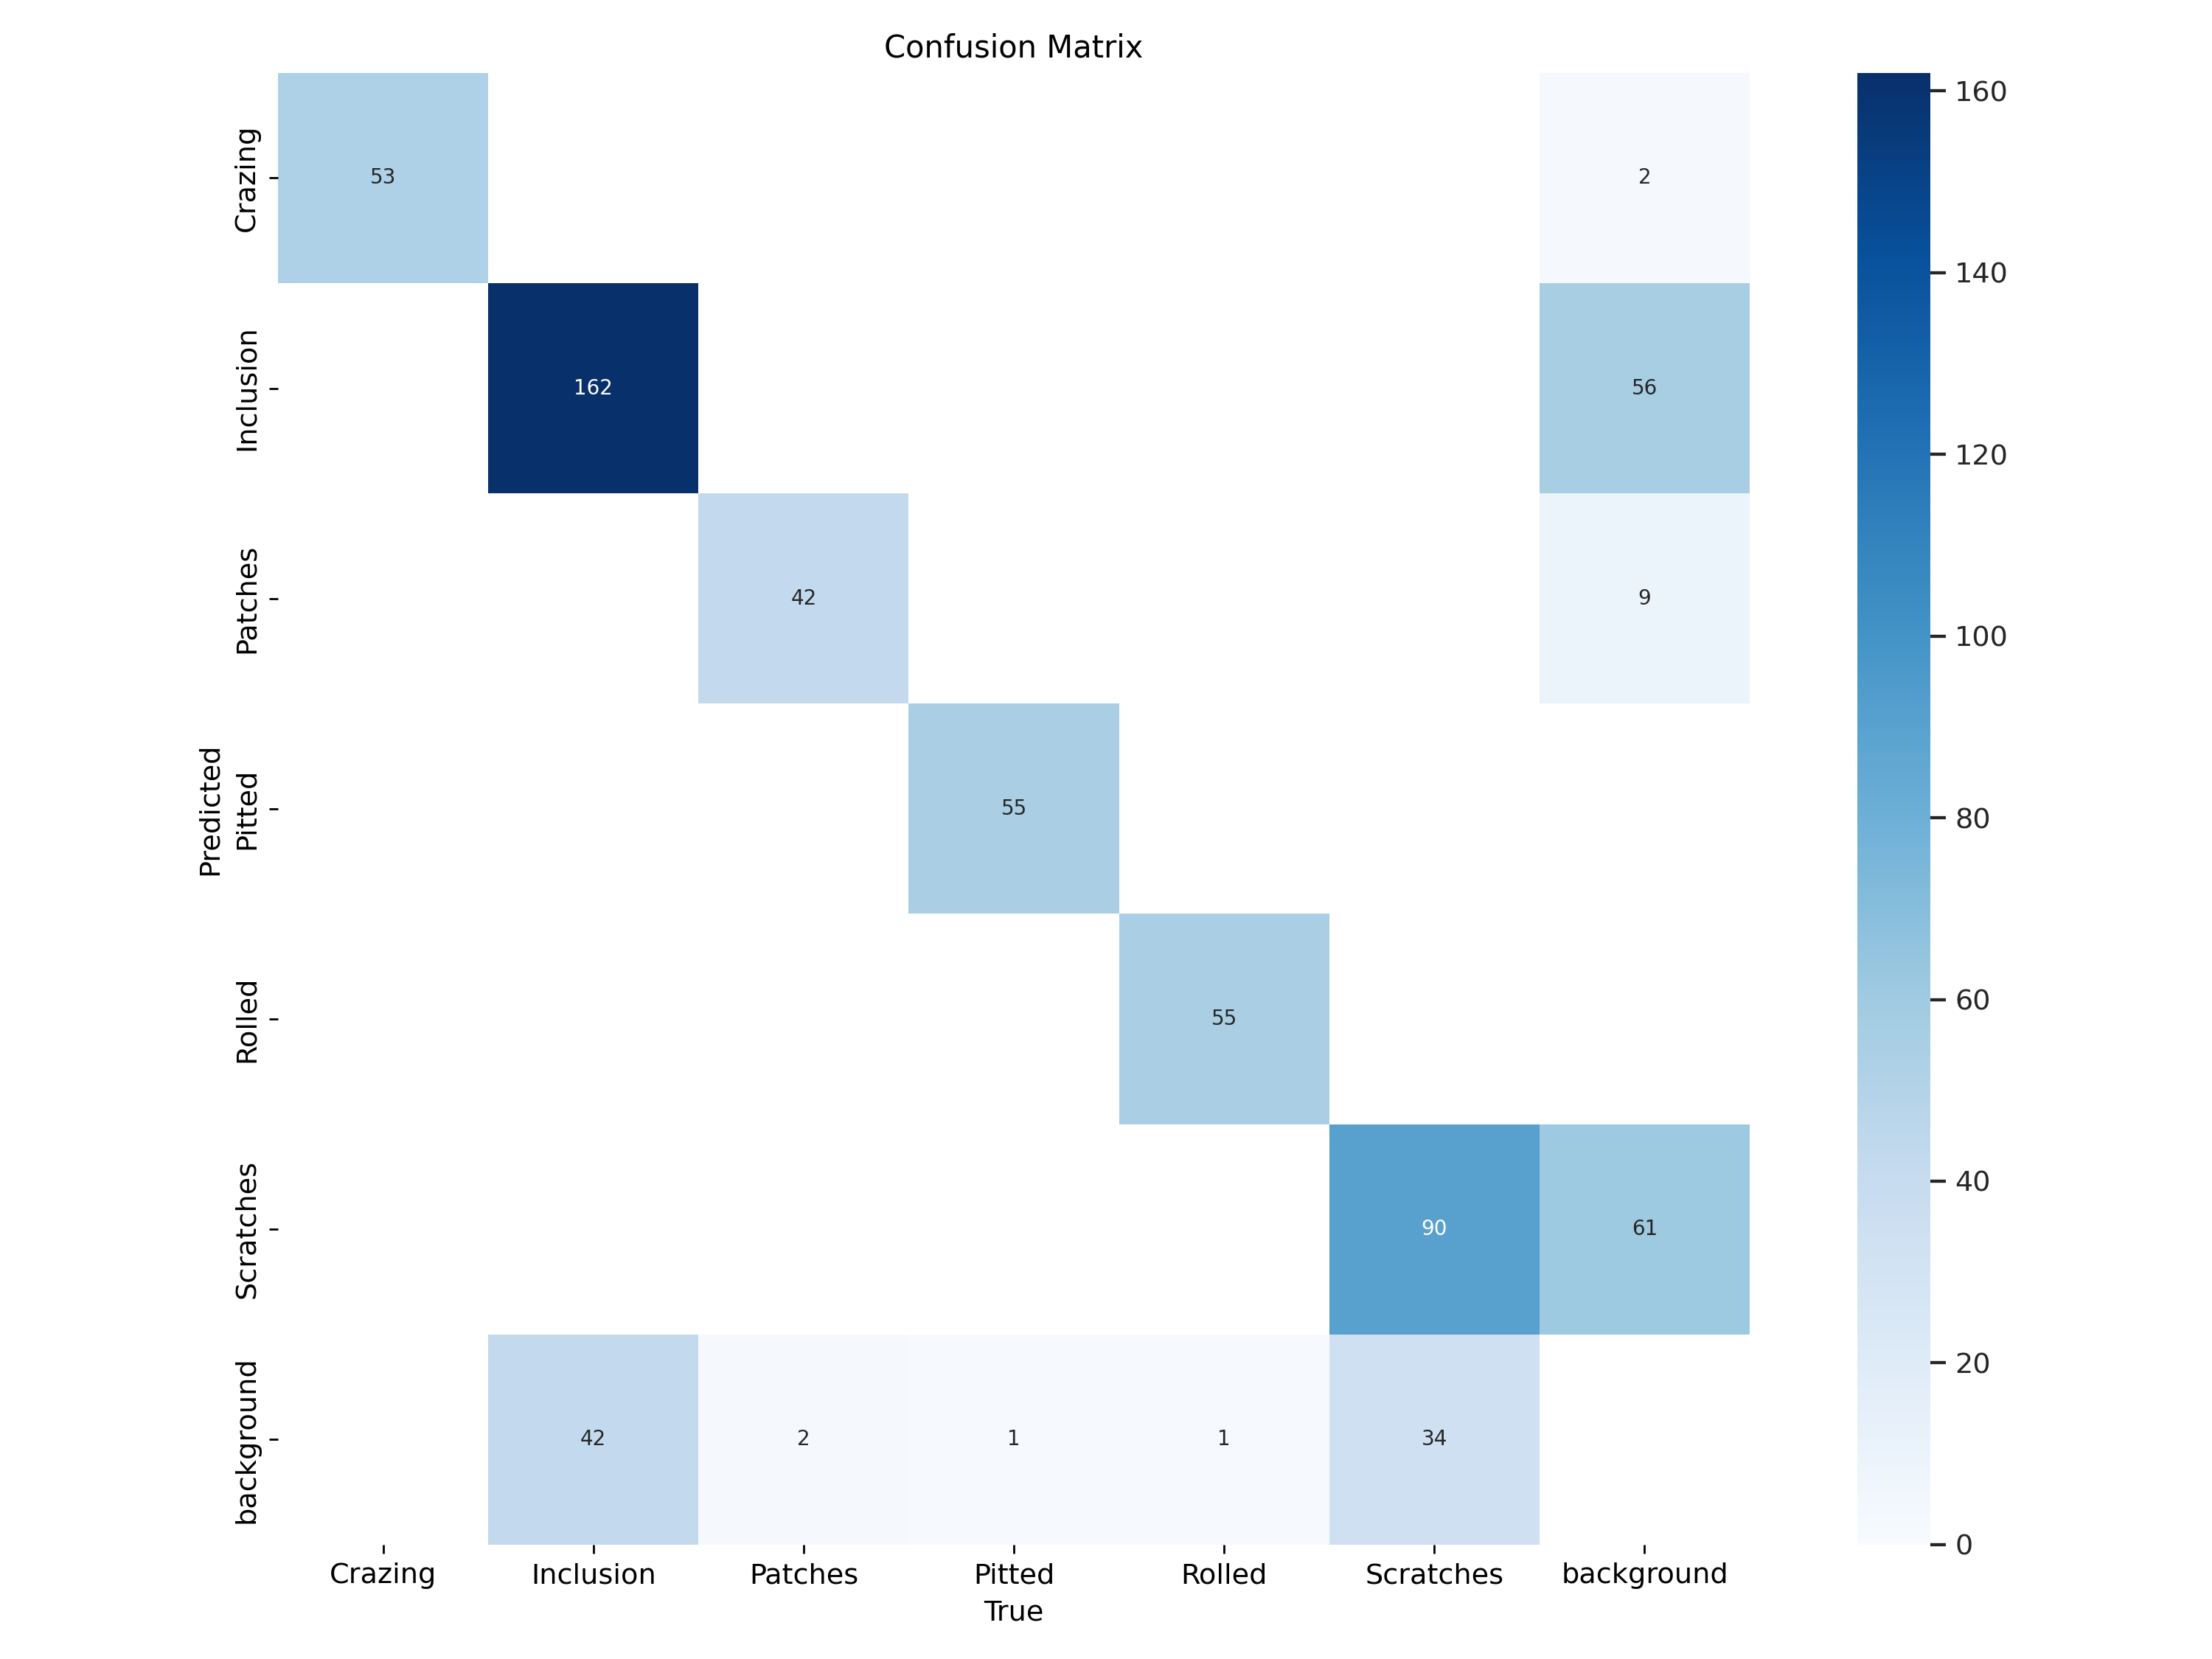

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/kaggle/working/runs/detect/train/confusion_matrix.png', width=1000)

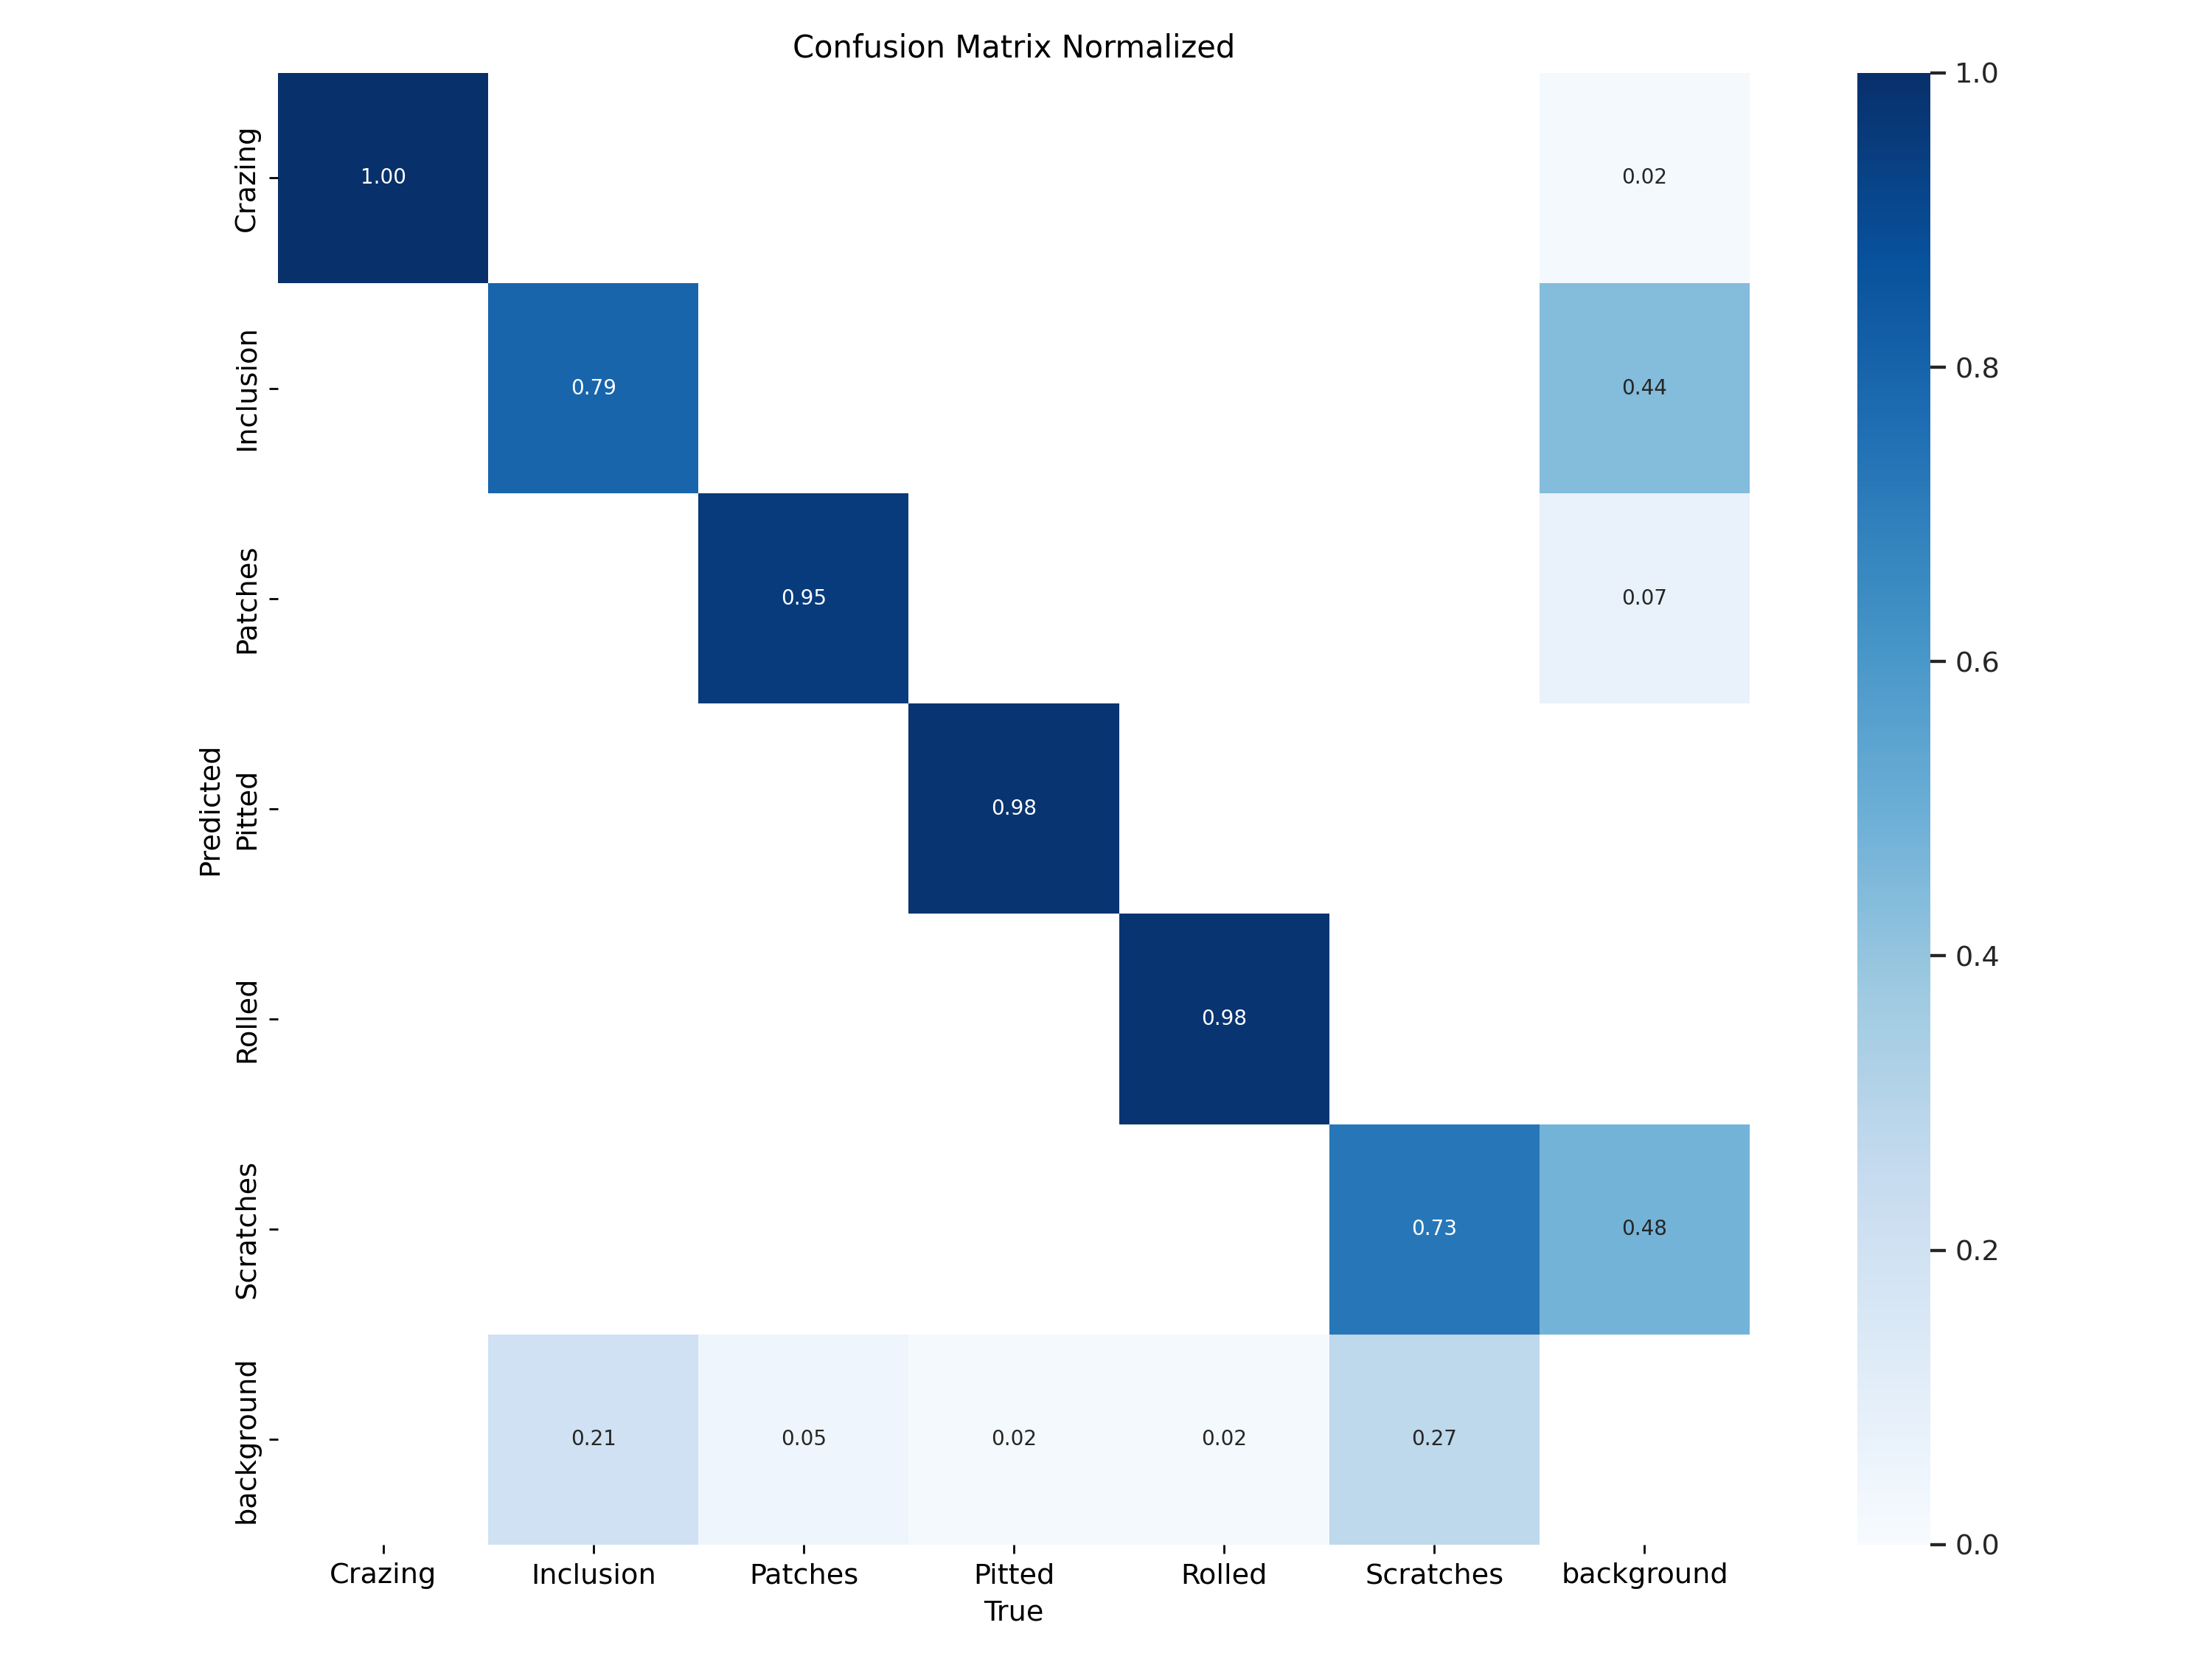

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/kaggle/working/runs/detect/train/confusion_matrix_normalized.png', width=1000)

### Sonuçların Yorumlanması

#### **1. Eğitim Kayıpları**
- **`train/box_loss:`**  
  Bu, modelin tahmin ettiği bounding box'ların doğruluğunu gösteren bir kayıp fonksiyonudur. Grafik, epoch ilerledikçe bu kaybın azaldığını gösteriyor.  
  - **Yorum:** Model bounding box tahminlerinde giderek daha iyi hale geliyor.

- **`train/cls_loss:`**  
  Sınıf tahminiyle ilgili kayıp değeridir (örneğin, hangi nesne olduğunu tahmin etme). Grafik bu kaybın düzenli bir şekilde azaldığını gösteriyor.  
  - **Yorum:** Model, nesne sınıflarını daha doğru bir şekilde tahmin ediyor.

- **`train/dfl_loss:`**  
  Distribution Focal Loss (DFL), bounding box'ların sınırlarını daha iyi tanımlamak için kullanılan bir kayıptır. Bu değer de azalmaktadır.  
  - **Yorum:** Model, nesnelerin sınırlarını giderek daha hassas bir şekilde tahmin ediyor.

#### **2. Doğrulama Kayıpları**
- **`val/box_loss:`**  
  Doğrulama veri setinde bounding box kaybıdır. Eğitim kaybıyla benzer bir azalma gösteriyor.  
  - **Yorum:** Model, doğrulama verileri üzerinde de genel olarak iyileşiyor ve overfitting gözlenmiyor.

- **`val/cls_loss:`**  
  Sınıf tahmini doğrulama kaybı. Değerlerin düzenli bir şekilde düştüğü görülüyor.  
  - **Yorum:** Model, doğrulama verileri üzerinde nesne sınıflarını doğru tahmin etmede başarılı.

- **`val/dfl_loss:`**  
  Bounding box sınırlarının doğrulama verilerindeki kaybı. Bu kayıp da azalmaktadır.  
  - **Yorum:** Modelin genel genelleme yeteneği doğrulama setinde de başarılı.

#### **3. Metriğe Dayalı Performans**
- **`metrics/precision(B):`**  
  Precision, pozitif tahminlerin ne kadarının doğru olduğunu gösterir. Grafik, precision değerinin eğitim süreci boyunca arttığını gösteriyor.  
  - **Yorum:** Modelin yanlış pozitif (False Positive) oranı azalıyor.

- **`metrics/recall(B):`**  
  Recall, modelin gerçek pozitif değerlerin ne kadarını yakaladığını gösterir. Bu metrik de artış göstermektedir.  
  - **Yorum:** Model, nesneleri giderek daha fazla doğru bir şekilde tespit ediyor.

- **`metrics/mAP50(B):`**  
  Ortalama Doğruluk (Mean Average Precision) metriğidir ve modelin genel performansını değerlendirir. Özellikle IoU (Intersection over Union) eşik değeri %50 olarak alınmıştır. Bu değer eğitim sürecinde yükseliyor.  
  - **Yorum:** Modelin genel doğruluğu iyileşiyor.

- **`metrics/mAP50-95(B):`**  
  Daha zorlu bir değerlendirme metriğidir; farklı IoU eşik değerlerinde performansı ölçer. Bu metrikte de belirgin bir artış var.  
  - **Yorum:** Model, farklı hassasiyet seviyelerinde daha iyi hale geliyor.

---

### **Genel Yorum**
- **Kayıplar:** Hem eğitim hem de doğrulama kayıplarında düzenli bir azalma görülüyor. Bu durum, modelin eğitim sırasında iyileştiğini ve doğrulama verileri üzerinde de genelleme yaptığını gösterir.
- **Metrikler:** Precision, Recall, mAP50 ve mAP50-95 gibi metriklerin artışı, modelin hem doğruluğunu hem de güvenilirliğini artırdığını kanıtlıyor.
- **Overfitting:** Eğitim ve doğrulama kayıpları arasında belirgin bir fark bulunmuyor, bu da overfitting olmadığını gösteriyor.

### **Sonuç**
Bu grafikler, modelin eğitim ve doğrulama sürecinde başarılı bir şekilde ilerlediğini, performansının hem eğitim hem de doğrulama verileri üzerinde iyileştiğini ve güvenilir bir genelleme yeteneği olduğunu gösteriyor. Model, nesne algılama görevlerinde iyi bir performans sergilemek için yeterli görünüyor.

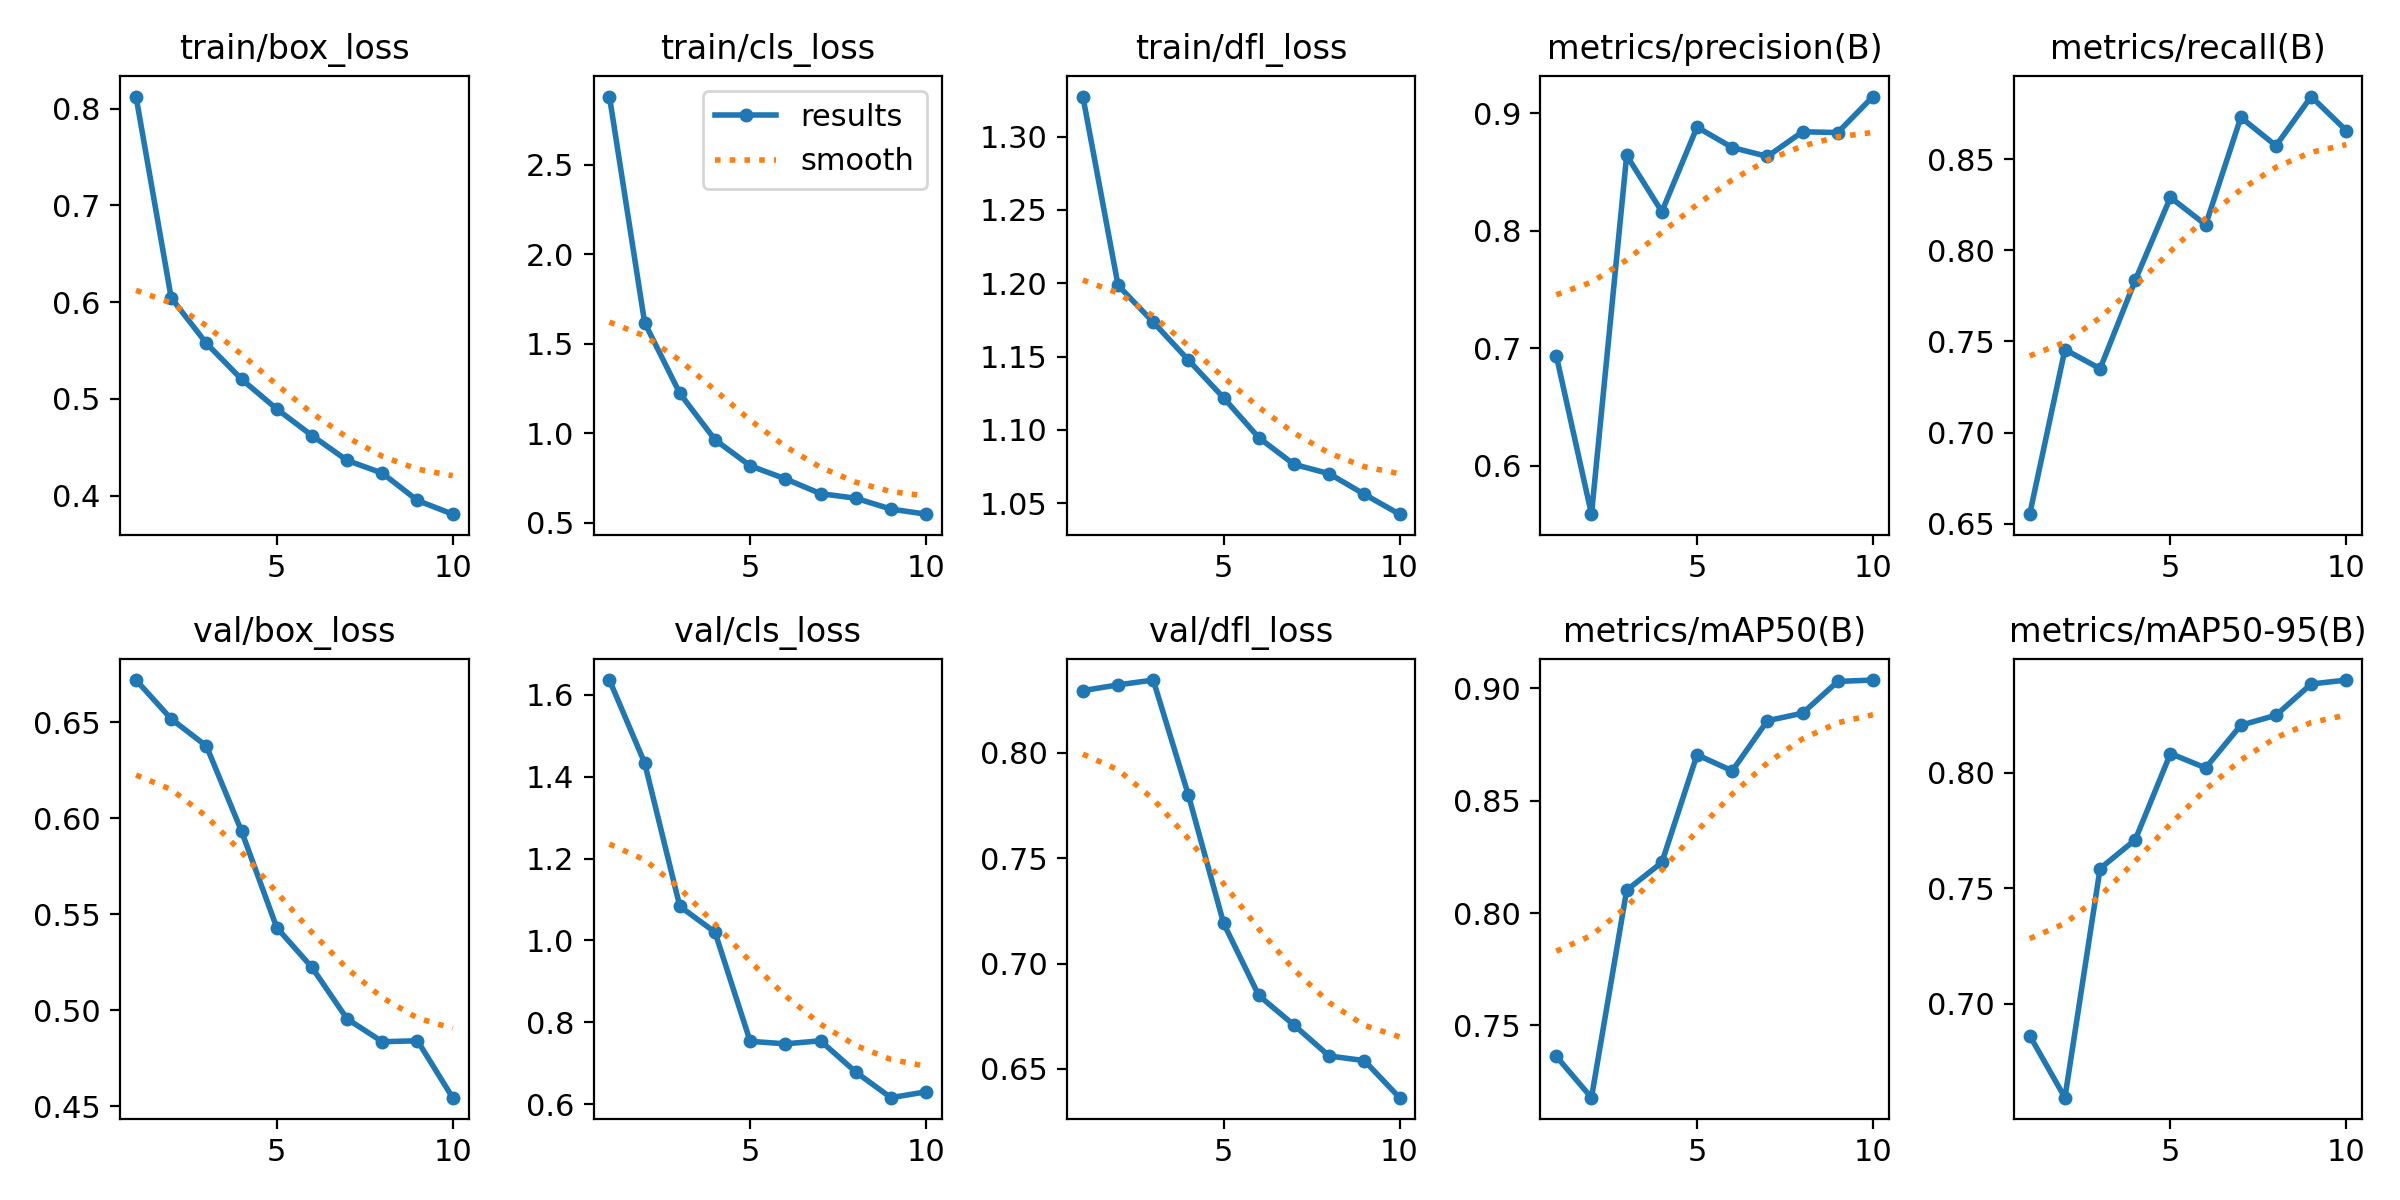

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/kaggle/working/runs/detect/train/results.png', width=1000)

### **Grafik Özellikleri**
1. **Precision (Doğruluk):**
   - Y ekseni, pozitif olarak tahmin edilen örneklerin ne kadarının doğru olduğunu gösterir.
   - Yüksek doğruluk, yanlış pozitiflerin az olduğunu ifade eder.

2. **Recall (Duyarlılık):**
   - X ekseni, gerçek pozitiflerin ne kadarının doğru bir şekilde tahmin edildiğini gösterir.
   - Yüksek duyarlılık, modelin pozitif sınıfları kaçırmadığını ifade eder.

3. **mAP@0.5 (Mean Average Precision):**
   - Tüm sınıflar için ortalama doğruluk ve duyarlılık performansını değerlendirir.
   - Bu grafikte tüm sınıflar için mAP@0.5 değeri **0.904** olarak verilmiştir, yani model genel olarak iyi bir performans sergilemektedir.

---

### **Sınıf Bazında Performans**
Her sınıf için eğriye ait bilgiler şu şekilde:

1. **Crazing (0.989):**
   - Bu sınıf için doğruluk ve duyarlılık performansı çok yüksek.
   - **Yorum:** Model, "Crazing" sınıfındaki kusurları neredeyse mükemmel bir şekilde algılıyor.

2. **Inclusion (0.848):**
   - Doğruluk ve duyarlılık daha düşük.
   - **Yorum:** Model bu sınıfta bazen yanlış pozitif veya yanlış negatif tahminler yapıyor.

3. **Patches (0.849):**
   - Inclusion sınıfına benzer bir doğruluk ve duyarlılık sergiliyor.
   - **Yorum:** Performans kabul edilebilir düzeyde ancak iyileştirme yapılabilir.

4. **Pitted (0.986):**
   - Çok yüksek bir doğruluk ve duyarlılık değeri var.
   - **Yorum:** Model, "Pitted" sınıfındaki nesneleri oldukça doğru bir şekilde tahmin ediyor.

5. **Rolled (0.986):**
   - Neredeyse mükemmel performans gösteriyor.
   - **Yorum:** "Rolled" sınıfı için modelin hataları minimal düzeyde.

6. **Scratches (0.764):**
   - En düşük doğruluk ve duyarlılık bu sınıfta görülüyor.
   - **Yorum:** Model, "Scratches" sınıfındaki nesneleri tanımakta daha çok zorluk çekiyor ve bu sınıf iyileştirilmesi gereken bir alan.

---

### **Genel Değerlendirme**
- **En İyi Performans:** "Crazing", "Pitted" ve "Rolled" sınıfları neredeyse mükemmel sonuçlar veriyor.
- **En Düşük Performans:** "Scratches" sınıfı, diğer sınıflara kıyasla daha düşük bir performans gösteriyor.
- **Genel Performans:** mAP@0.5 değeri **0.904**, modelin genel olarak başarılı olduğunu, yüksek doğruluk ve duyarlılık sergilediğini gösteriyor.

---

### **Yorum ve Öneriler**
1. **Güçlü Alanlar:** Model, "Crazing", "Pitted" ve "Rolled" sınıflarında neredeyse mükemmel sonuçlar vermektedir.
2. **Geliştirilmesi Gereken Alanlar:** 
   - "Scratches" sınıfı üzerinde daha fazla veri ile eğitim yapılabilir.
   - "Inclusion" ve "Patches" sınıflarında modelin performansı iyileştirilebilir.
3. **Genel Model İyileştirme:** Veri artırma (data augmentation) veya sınıf dengesizliği problemlerini çözmek için stratejiler uygulanabilir.

Modelin genel olarak güçlü bir performansa sahip olduğu, ancak bazı sınıflar için daha fazla iyileştirme yapılması gerektiği söylenebilir.

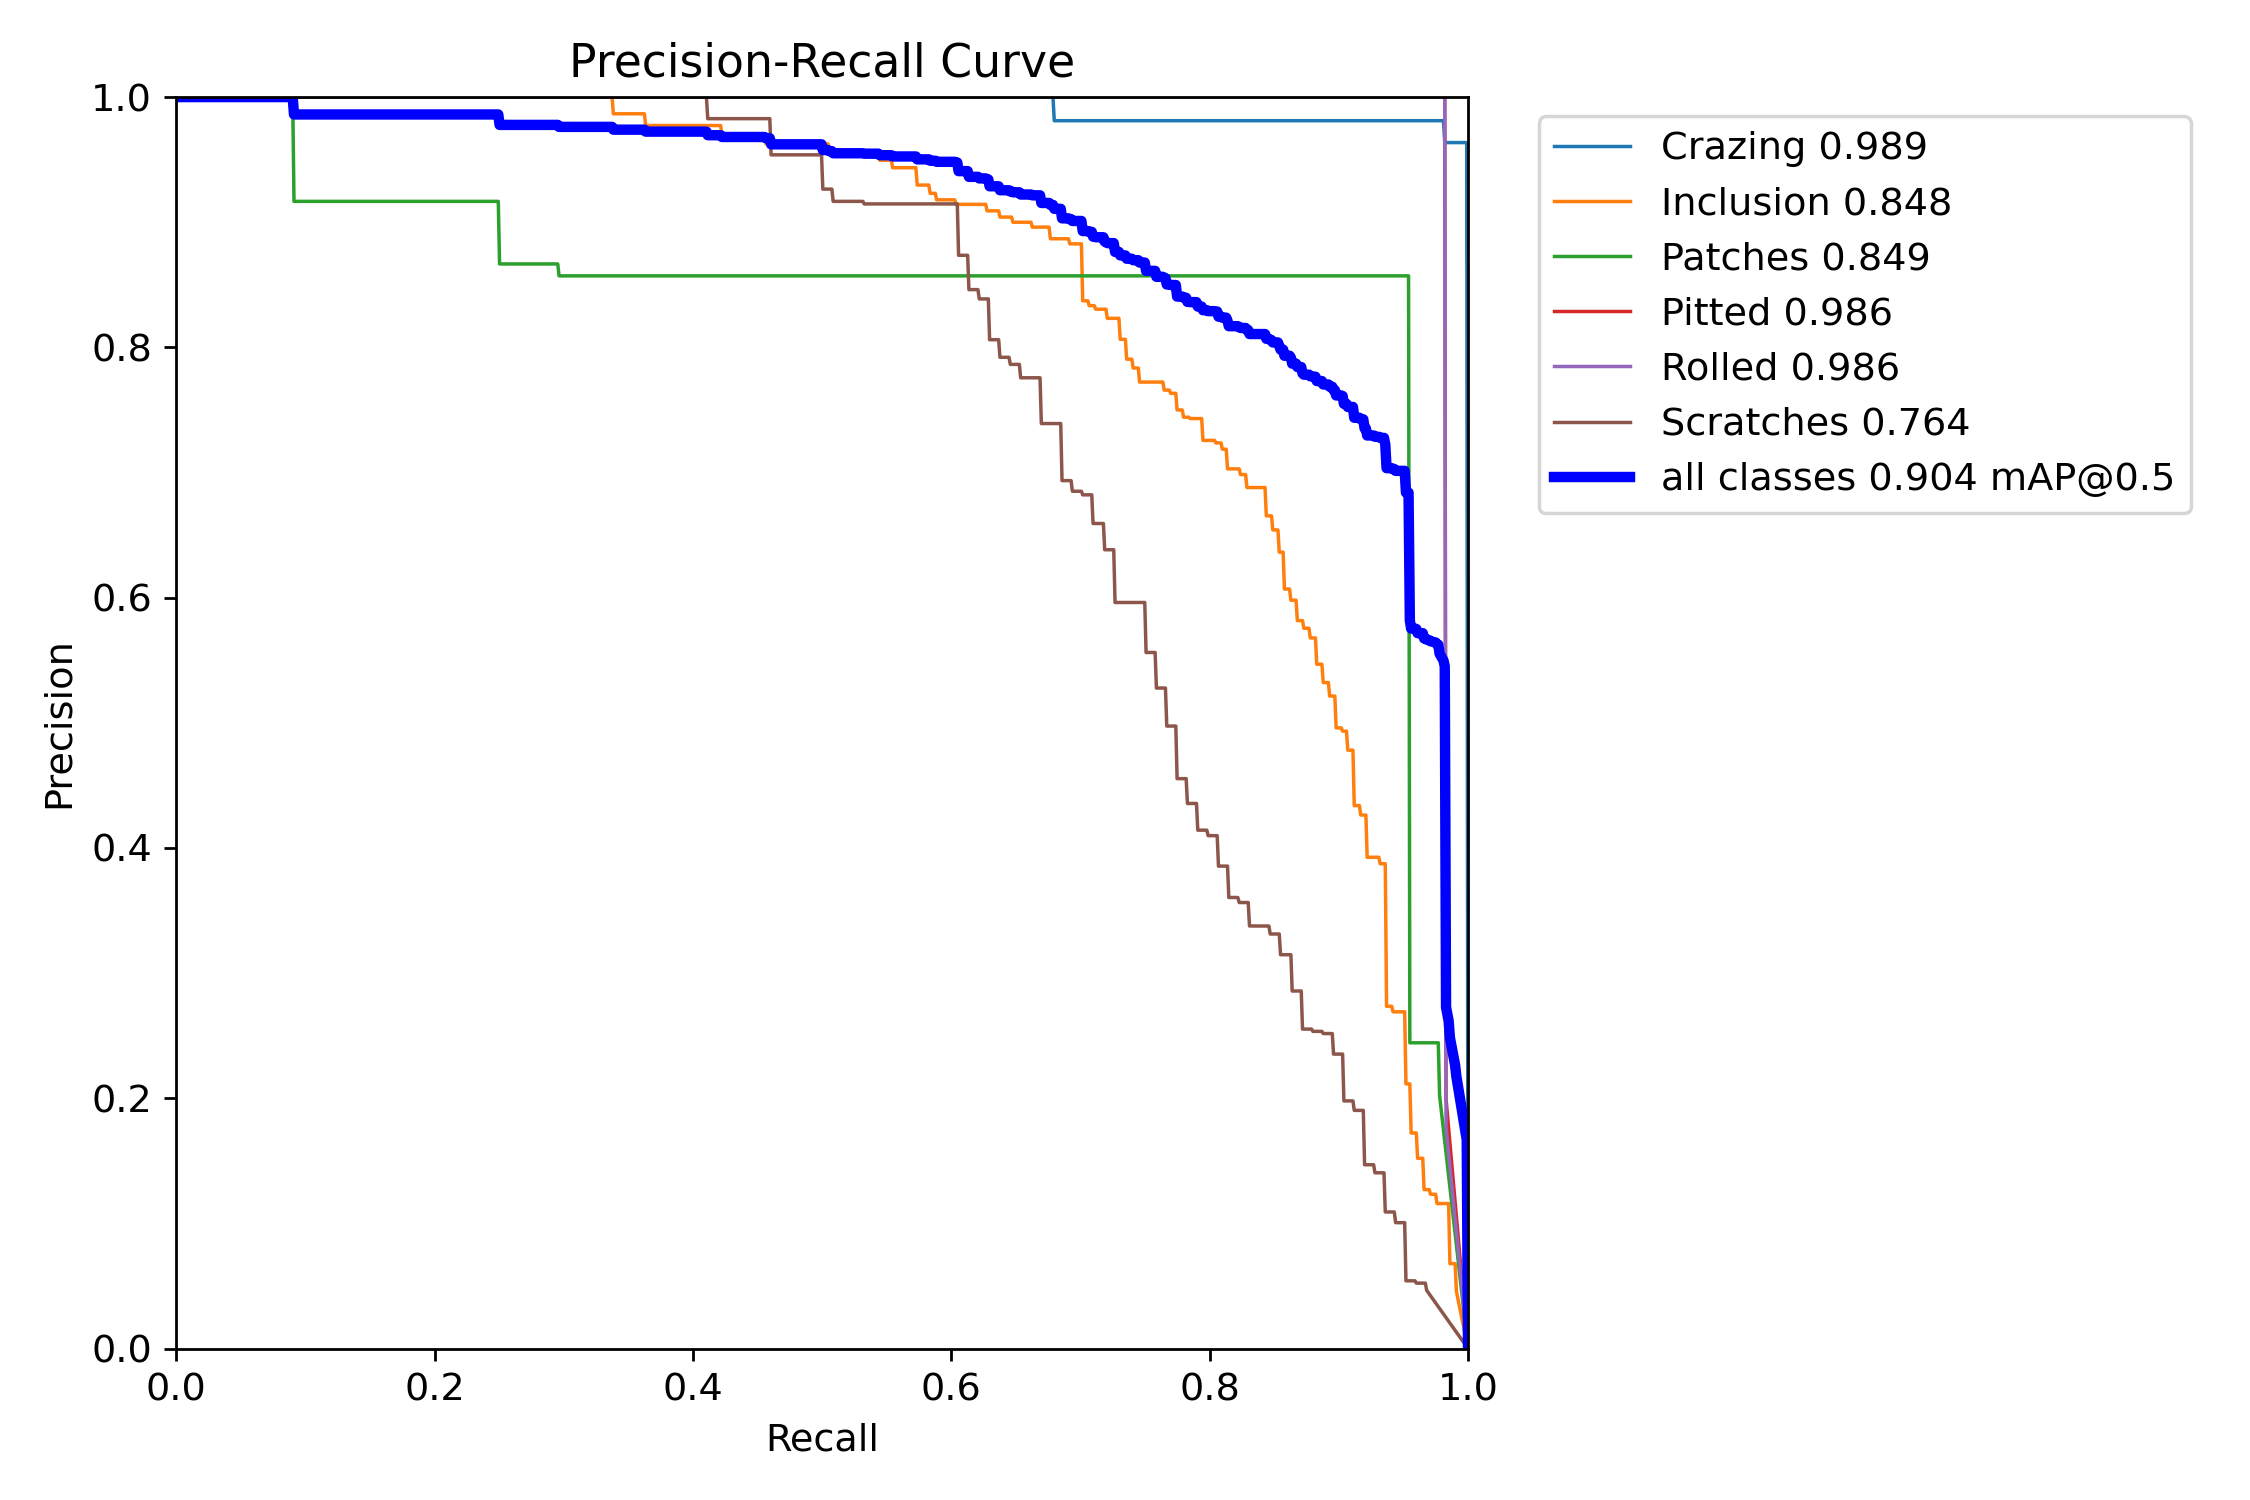

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/kaggle/working/runs/detect/train/PR_curve.png', width=1000)

### **Grafik Özellikleri ve Yorumları**

#### **1. Sınıf Dağılımı (Üst Sol Grafik)**
- **Açıklama:**  
  Bu grafik, her sınıfa ait veri setindeki örnek sayısını göstermektedir.
  - **Inclusion** sınıfı en fazla örneğe sahip (yaklaşık 2000 örnek).
  - **Crazing**, **Patches**, **Pitted**, ve **Rolled** sınıfları nispeten dengeli bir şekilde dağılmış.
  - **Scratches** sınıfı yaklaşık 1000 örnekle veri setindeki ikinci büyük sınıf.

- **Yorum:**  
  Veri setinde bazı sınıflar arasında dengesizlik bulunmaktadır:
  - **Inclusion** sınıfı aşırı derecede fazla temsil edilmişken, diğer sınıflar daha az sayıda örneğe sahiptir.
  - Bu durum, modelin "Inclusion" sınıfına aşırı uyum sağlamasına (overfitting) ve daha az temsil edilen sınıflarda düşük performansa neden olabilir.
  - Veri dengesizliğini gidermek için, **veri artırma (data augmentation)** veya **sınıf ağırlıklandırma** stratejileri uygulanabilir.

---

#### **2. Etiketlerin Konum Dağılımı (Alt Sol Grafik - x ve y)**
- **Açıklama:**  
  Bu grafik, bounding box'ların merkezi noktalarının (x, y koordinatları) veri seti içindeki dağılımını göstermektedir.
  - Merkezler oldukça geniş bir alana yayılmış durumda.
  - Yoğunluk, özellikle (0.5, 0.5) civarında artış göstermiş.

- **Yorum:**  
  Bounding box'lar genellikle görüntünün ortasına yakın nesneleri içermektedir. 
  - Bu durum, veri setindeki nesnelerin konumları açısından belirli bir bias olabileceğini gösterir.
  - Merkezlerin belirli bir bölgede toplanması, modelin görüntü ortasındaki nesnelere daha duyarlı olmasına neden olabilir. Köşelerdeki nesneler için performans düşebilir.

---

#### **3. Bounding Box Boyutları (Alt Sağ Grafik - width ve height)**
- **Açıklama:**  
  Bu grafik, bounding box'ların genişlik (width) ve yükseklik (height) değerlerinin dağılımını göstermektedir.
  - Dağılım genellikle düşük değerler (küçük kutular) arasında yoğunlaşmış.
  - Ancak, daha büyük bounding box'lar da az miktarda bulunmaktadır.

- **Yorum:**  
  Veri setinde küçük nesneler baskın durumdadır. Bu, modelin küçük nesneleri tanımada daha iyi performans gösterebileceğini, ancak büyük nesnelerde zorlanabileceğini gösterir.
  - **Öneri:** Büyük nesnelere sahip veriler eklenerek veri seti dengelenebilir. Ayrıca, küçük nesneler üzerindeki performansı artırmak için **focal loss** gibi teknikler kullanılabilir.

---

### **Genel Değerlendirme**
1. **Sınıf Dağılımı:**
   - Veri setinde ciddi bir dengesizlik gözlemleniyor. Bu, model performansını etkileyebilir.
   - Sınıf dağılımını dengelemek için daha az temsil edilen sınıflara yönelik veri artırma stratejileri kullanılabilir.

2. **Bounding Box Konumları:**
   - Bounding box merkezleri genellikle görüntünün ortasına yakın. Köşe bölgelerindeki nesneler için modelin performansı izlenmeli.

3. **Bounding Box Boyutları:**
   - Küçük bounding box'lar baskın durumda. Modelin bu tür nesneleri iyi algılaması muhtemel, ancak büyük bounding box'lar üzerinde test yapılmalıdır.

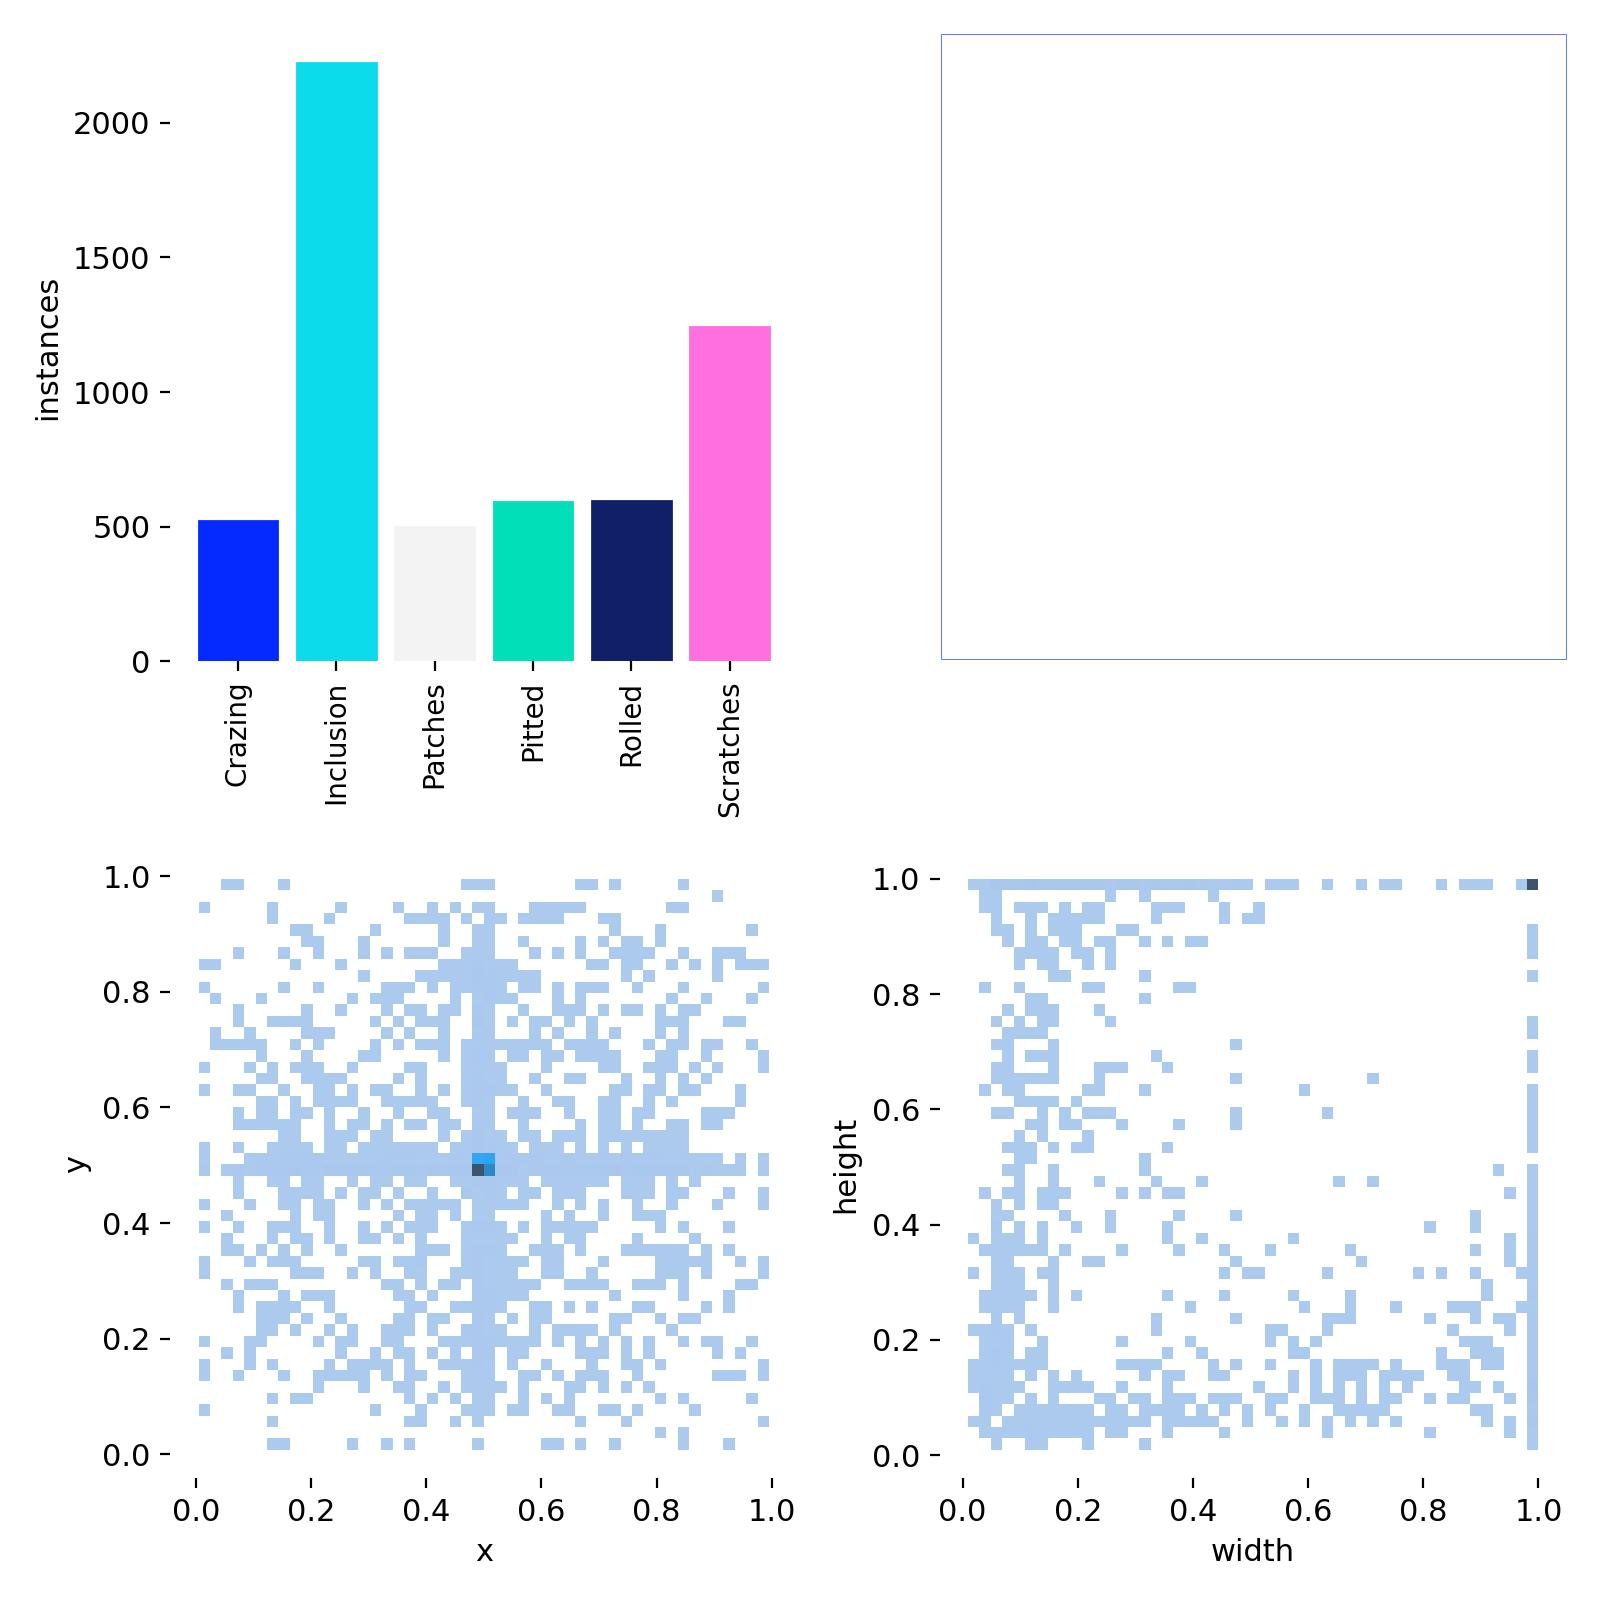

In [13]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/kaggle/working/runs/detect/train/labels.jpg', width=1000)

### **Grafikteki Özellikler ve Yorumlar**

#### **1. Dağılım Grafikleri (Histogramlar)**
- **x (Sol Üst - İlk Satır):**  
  - x ekseni, bounding box'ların yatay eksendeki merkez konumlarını gösterir.
  - x değerleri genellikle 0.5 civarında yoğunlaşmıştır, bu da bounding box'ların genelde görüntünün yatay olarak ortasına yakın yerleştirildiğini ifade eder.

- **y (İkinci Satır):**  
  - y ekseni, bounding box'ların dikey eksendeki merkez konumlarını gösterir.
  - y değerleri de ağırlıklı olarak 0.5 civarında yoğunlaşmıştır. Bu, bounding box'ların genelde görüntünün dikey olarak ortasında yer aldığını gösterir.

- **width (Genişlik):**  
  - Bounding box genişlikleri çoğunlukla düşük değerlere sahiptir (0.2 ile 0.4 arasında yoğunlaşma var). Bu, küçük nesnelerin veri setinde daha baskın olduğunu gösterir.

- **height (Yükseklik):**  
  - Bounding box yükseklikleri de genişliklere benzer şekilde düşük değerlere sahiptir ve genelde 0.2 ile 0.4 arasında yoğunlaşmıştır. Küçük nesnelerin varlığı bir kez daha doğrulanmaktadır.

---

#### **2. İkili Dağılımlar (Scatterplotlar ve Heatmap)**
- **x ve y (Bounding Box Merkezleri):**  
  - Scatterplot, x ve y koordinatlarının genelde 0.5 civarında yoğunlaştığını göstermektedir.
  - **Yorum:** Bounding box'lar genellikle görüntünün ortasına yakın konumlanmıştır. Köşelerdeki nesneler veri setinde daha az yer alıyor olabilir.

- **x ve width / y ve height:**  
  - x ile genişlik arasında veya y ile yükseklik arasında belirgin bir korelasyon yoktur. Bu da bounding box'ların merkezi konumları ile boyutları arasında güçlü bir ilişki olmadığını gösterir.

- **width ve height (Bounding Box Boyutları):**  
  - Genişlik ve yükseklik arasında hafif bir ilişki gözlemlenebilir. Büyük bounding box'ların hem genişliği hem de yüksekliği büyük olma eğilimindedir.
  - Ancak veri setindeki büyük nesneler azdır ve küçük nesneler baskındır.

---

### **Genel Yorum ve Öneriler**
1. **Bounding Box Konumları (x, y):**
   - Bounding box'ların merkezleri genellikle görüntünün ortasına yakın bir şekilde yoğunlaşmıştır.
   - Köşe bölgelerinde yer alan bounding box sayısının az olması, modelin bu bölgelerdeki nesneleri algılamada zorlanabileceğini gösterebilir.
   - **Öneri:** Veri setine köşe bölgelerinde yer alan nesneler eklenebilir veya veri artırma yöntemleriyle bu bölgelerdeki nesne dağılımı iyileştirilebilir.

2. **Bounding Box Boyutları (width, height):**
   - Genişlik ve yüksekliklerin çoğu küçük değerlere sahiptir, bu da küçük nesnelerin veri setinde baskın olduğunu gösterir.
   - Büyük bounding box'lar az sayıda olduğundan, model bu nesnelerde düşük performans gösterebilir.
   - **Öneri:** Veri setine daha fazla büyük nesne eklenebilir veya sınıf dengesizliklerini azaltmak için stratejiler uygulanabilir.

3. **Genel Dağılım:**
   - Veri seti büyük ölçüde dengeli görünüyor, ancak bounding box boyutları ve konumlarının daha iyi genelleme yapabilmesi için çeşitlendirilebilir.

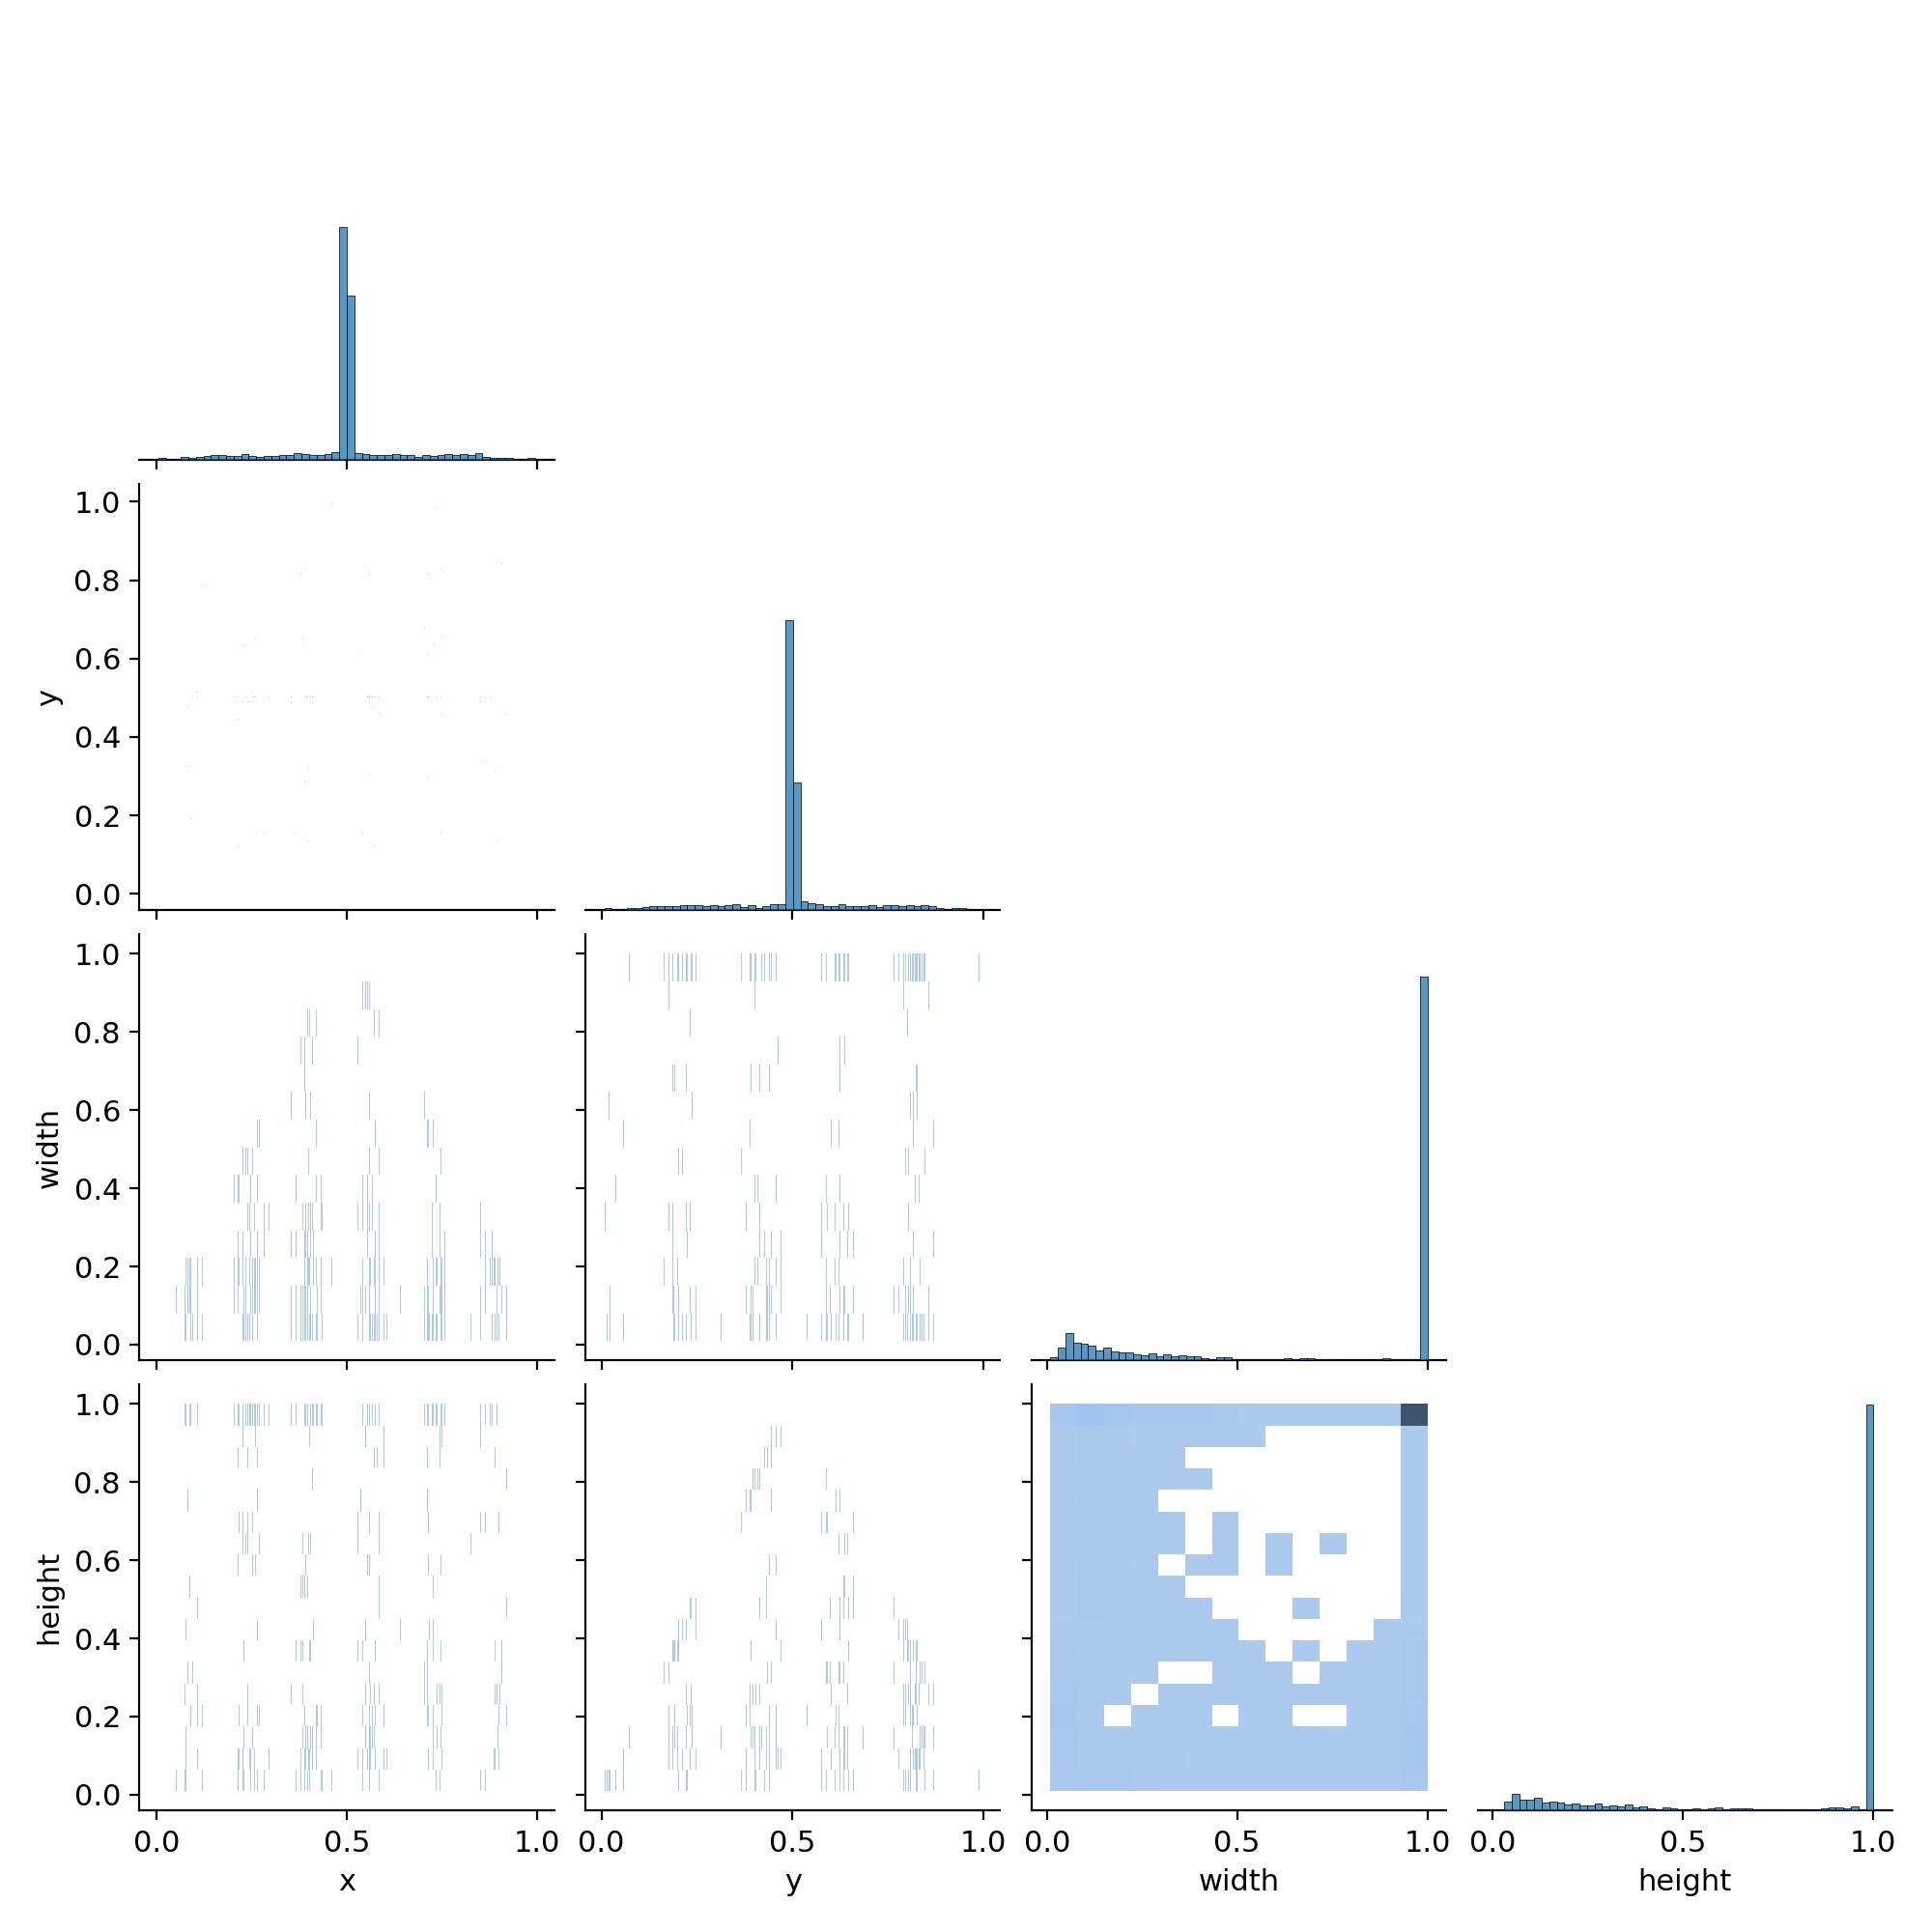

In [15]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/kaggle/working/runs/detect/train/labels_correlogram.jpg', width=1000)

### Modelde Predict
**Predict**, makine öğrenimi veya derin öğrenme modellerinde modelin **tahmin yapma** işlemine verilen isimdir. Model, eğitim sırasında öğrendiği bilgileri kullanarak yeni veriler üzerinde sonuç üretir. Predict işlemi, genellikle modelin **eğitim ve değerlendirme sürecinden sonra** gerçekleştirilir ve gerçek dünya verilerinde nasıl performans gösterdiğini anlamamıza yardımcı olur.

---

### **Predict İşleminin Temel Özellikleri**
1. **Amaç:**  
   Predict işlemi, modelin daha önce görmediği (test ya da gerçek dünya) veriler üzerinde tahmin yapmasını sağlar.

2. **Giriş:**  
   Modelin eğitildiği veri formatına uygun bir veri sağlanır. Örneğin:
   - Görüntü işleme modellerinde bir resim veya bir grup resim.
   - Doğal dil işleme modellerinde metin.
   - Regresyon modellerinde sayısal veri.

3. **Çıktı:**  
   Predict işlemi, modelin türüne bağlı olarak farklı çıktılar üretir:
   - **Sınıflandırma modelleri:** Sınıf tahmini (ör. "kedi", "köpek").
   - **Regresyon modelleri:** Sayısal değer tahmini (ör. bir evin fiyatı).
   - **Nesne algılama modelleri:** Tespit edilen nesnelerin sınıfı ve konumu.

---

### **Predict'in Kullanımı**
Predict işlemi genellikle bir **framework** veya **API** kullanılarak çağrılır. İşte yaygın kütüphanelerle predict örnekleri:

#### **1. Keras/TensorFlow**
```python
predictions = model.predict(new_data)
```
- **Giriş:** `new_data` modelin beklediği veri formatında olmalıdır.
- **Çıktı:** Tahmin sonuçları, sınıflar veya sayısal değerler.

#### **2. PyTorch**
```python
model.eval()  # Modeli değerlendirme moduna alır
with torch.no_grad():  # Geriye yayılımı (gradient hesaplamalarını) devre dışı bırakır
    predictions = model(new_data)
```
- **Yorum:** `eval()` fonksiyonu, dropout gibi işlemleri devre dışı bırakarak predict modunda çalışmayı sağlar.

#### **3. Scikit-learn**
```python
predictions = model.predict(X_test)
```
- **Yorum:** `X_test` modeli eğitmekte kullanılan özelliklere uygun olmalıdır.

---

### **Predict'in Model Türlerine Göre Özellikleri**
1. **Sınıflandırma Modelleri:**
   - Çıktı: Bir veya birden fazla sınıf için olasılıklar veya doğrudan sınıf etiketleri.
   - Örneğin, bir köpek mi yoksa kedi mi olduğunu tahmin eden model.

2. **Regresyon Modelleri:**
   - Çıktı: Sürekli bir sayısal değer (örneğin, ev fiyatı tahmini).

3. **Nesne Algılama Modelleri:**
   - Çıktı: Sınıf etiketleri ve bounding box koordinatları.
   - Örneğin, bir görüntüdeki nesnelerin sınıflarını ve konumlarını tahmin eder.

4. **Doğal Dil İşleme Modelleri:**
   - Çıktı: Metin sınıfları, anlam analizi, metin tahmini veya metin oluşturma.

---

### **Predict'in Kullanım Alanları**
- **Görüntü İşleme:**  
  Nesne algılama, yüz tanıma, görüntü sınıflandırma.
- **Doğal Dil İşleme:**  
  Duygu analizi, metin sınıflandırma, dil modeli tahmini.
- **Regresyon:**  
  Finansal tahminler (ör. hisse senedi fiyatı), mühendislik uygulamaları.
- **Tıp:**  
  Hastalık teşhisi, tıbbi görüntü analizi.
- **Oyun ve Simülasyon:**  
  AI karar verme, strateji belirleme.

---

### **Predict'in Önemi**
- **Model Performansı:** Predict, bir modelin gerçek dünyadaki performansını değerlendirmek için temel adımdır.
- **Gerçek Dünya Uygulamaları:** Predict işlemi sayesinde eğitimli modeller, görüntü algılama, metin analizi, tahmin sistemleri gibi birçok alanda uygulanabilir.
- **Kullanıcı Geri Bildirimi:** Predict sonuçlarına göre modelin doğru çalışıp çalışmadığı analiz edilir ve gerektiğinde iyileştirme yapılır.

Predict, bir modelin pratik olarak nasıl kullanılacağını gösteren en önemli adımlardan biridir. Modeli eğitmek kadar doğru bir şekilde predict işlemi yapmak da modelin etkili bir şekilde çalışmasını sağlar.

In [16]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.52 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs

image 1/168 /kaggle/working/datasets/Metal-Surface-Defects-2/test/images/Cr_132_bmp.rf.7b3d467d9cfd4dcf00a5e6c7fcef89e9.jpg: 640x640 1 Crazing, 9.7ms
image 2/168 /kaggle/working/datasets/Metal-Surface-Defects-2/test/images/Cr_13_bmp.rf.3869f471b50c377737fc80219f4cb059.jpg: 640x640 1 Crazing, 8.3ms
image 3/168 /kaggle/working/datasets/Metal-Surface-Defects-2/test/images/Cr_154_bmp.rf.e0d2a25fe2560d21402620d3d419f1c1.jpg: 640x640 1 Crazing, 8.9ms
image 4/168 /kaggle/working/datasets/Metal-Surface-Defects-2/test/images/Cr_157_bmp.rf.1f637fb3c2838f24845846b418ebb9d2.jpg: 640x640 1 Crazing, 7.9ms
image 5/168 /kaggle/working/datasets/Metal-Surface-Defects-2/test/images/Cr_167_bmp.rf.d8f018024a703b3b9f43a84648022fb2.jpg: 640x640 1 Crazing, 7.3ms
image 6/168 /kaggle/working/datasets/Metal-Surface-Defects-2/test/images/Cr_185

### **ONNX (Open Neural Network Exchange) Formatı Nedir?**

**ONNX**, farklı makine öğrenimi framework'leri (ör. PyTorch, TensorFlow) arasında **model paylaşımı, çalıştırma ve optimizasyon** için kullanılan açık bir formattır. Modelleri platformdan bağımsız hale getirir, performans artışı sağlar ve kolay entegrasyon sunar.

---

### **ONNX'in Kullanım Alanları**

1. **Framework Uyumluluğu:**  
   - Bir framework'de (ör. PyTorch) eğitilen modeller başka bir framework'de (ör. TensorRT, ONNX Runtime) çalıştırılabilir.

2. **Optimizasyon ve Performans:**  
   - Modeller, **ONNX Runtime**, **TensorRT**, veya **OpenVINO** gibi araçlarla hızlandırılır.  
   - Özellikle gerçek zamanlı uygulamalarda (ör. nesne algılama) faydalıdır.

3. **Platform ve Donanım Bağımsızlığı:**  
   - ONNX modelleri CPU, GPU, veya edge cihazlarda kolayca çalıştırılabilir.

4. **Sıkıştırma ve Taşınabilirlik:**  
   - Bellek ve işlem gücü sınırlı cihazlar (ör. IoT) için idealdir.

---

### **ONNX'in Çalışma Süreci**

1. **Dışa Aktarma:**  
   - Model ONNX formatına dönüştürülür:  
     ```python
     torch.onnx.export(model, input_data, "model.onnx")
     ```

2. **İçeri Aktarma:**  
   - ONNX modelini çalıştırmak için:  
     ```python
     import onnxruntime as ort
     session = ort.InferenceSession("model.onnx")
     ```

3. **Optimizasyon ve Çalıştırma:**  
   - Model hızlandırılır ve farklı cihazlarda çalıştırılır.

---

### **ONNX Kullanmanın Avantajları**

- **Esneklik:** Farklı framework'lerde model paylaşımı.  
- **Performans:** Optimize edilmiş tahmin hızı.  
- **Taşınabilirlik:** Çeşitli donanımlarda çalışma.  
- **Standartlaşma:** Ekiplere ve projelere kolay entegrasyon.

---

### **Örnek Uygulamalar**

- **Gerçek Zamanlı Uygulamalar:** Nesne algılama, yüz tanıma.  
- **IoT ve Edge Cihazları:** Düşük güçlü cihazlarda hızlı model çalıştırma.  
- **Üretim Ortamı:** Optimizasyonlu, hızlı model tahmini.

---

**Sonuç:** ONNX formatı, makine öğrenimi modellerini **platform bağımsız**, **hızlı** ve **entegre edilebilir** hale getirir, modern veri bilimi projelerinde önemli bir rol oynar.

In [17]:
!yolo export model={HOME}/runs/detect/train/weights/best.pt format=onnx  # export custom trained model

Ultralytics 8.3.52 🚀 Python-3.10.14 torch-2.4.0 CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from '/kaggle/working/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.6/142.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 298.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 246.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 277.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.6s, installed 2 packages: ['onnxslim', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.

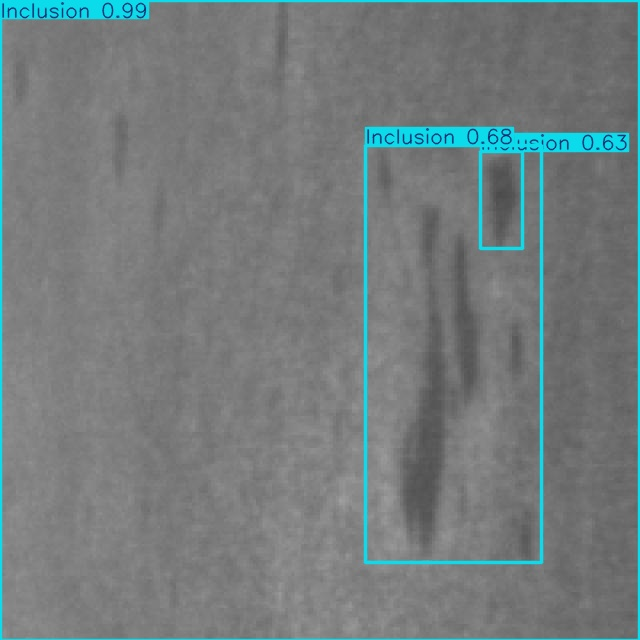

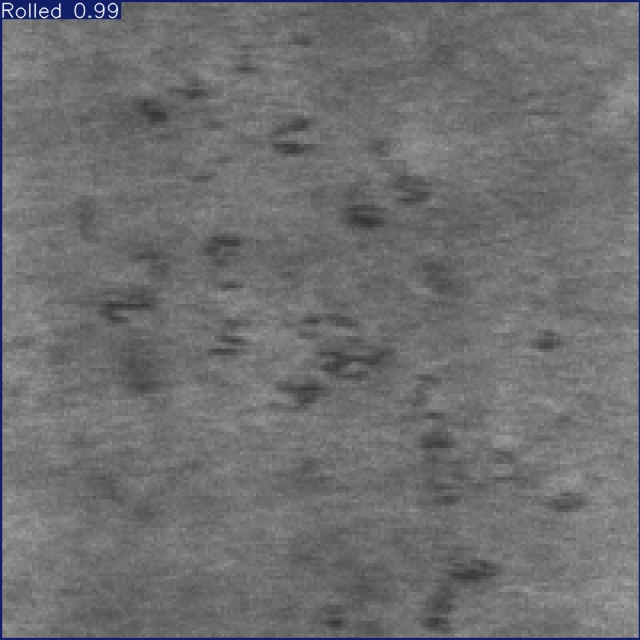

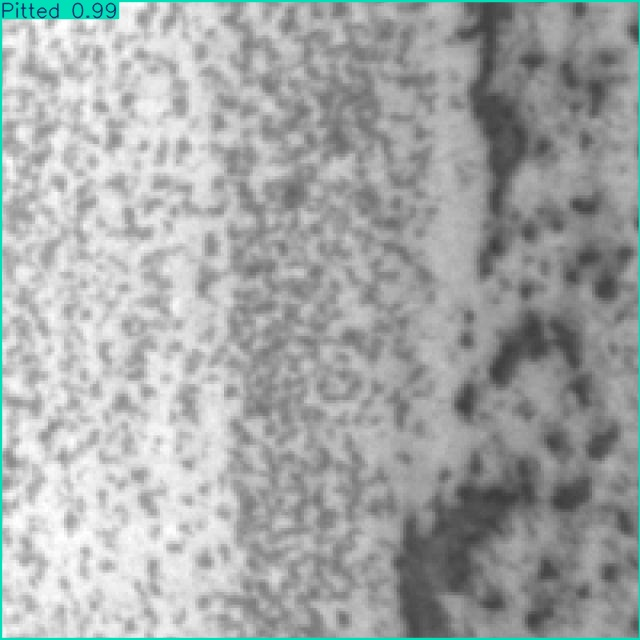

In [18]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/kaggle/working/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
	display(IPyImage(filename=img, width=600))
	print("\n")

## Kaynakça
* https://www.datacamp.com/blog/yolo-object-detection-explained
* https://www.researchgate.net/figure/Comparison-of-frames-processed-per-second-FPS-implementing-the-Faster-R-CNN-R-FCN-SSD_fig6_342570032
* https://blog.roboflow.com/guide-to-yolo-models/
* https://www.geeksforgeeks.org/convolutional-neural-network-cnn-in-machine-learning/
* https://miro.medium.com/v2/resize:fit:850/1*zluue9PRiqLxhG6h7Qprlg.png
* https://acikerisim.sakarya.edu.tr/xmlui/handle/20.500.12619/101474
* https://docs.ultralytics.com/models/yolo11/
* https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolo11-object-detection-on-custom-dataset.ipynb
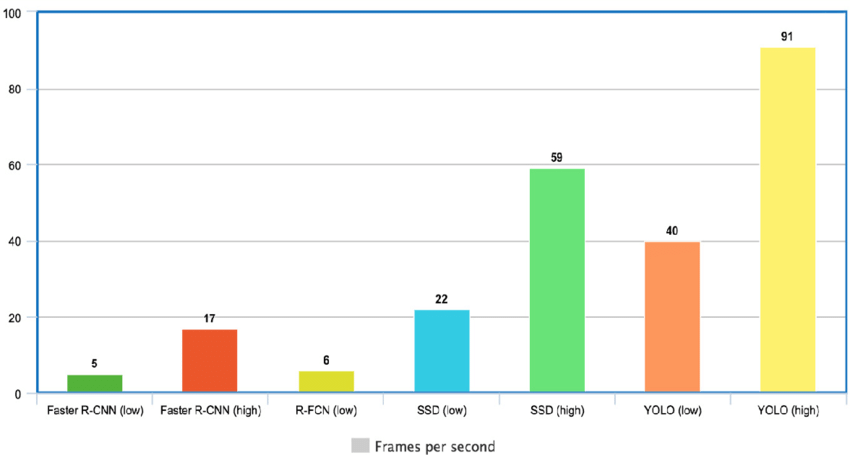
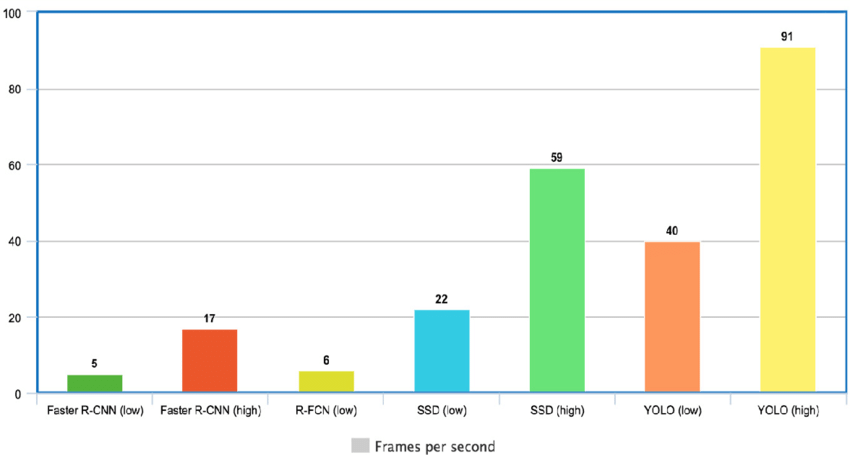